## Installing and Importing all Necessary Libraries

In [ ]:
## Install the necessary Python packages
!pip install nltk
!pip install textblob
!pip install tensorflow
!pip install scikeras
!pip install transformers
!pip install keras-tuner
!pip install tensorflow
!pip install xgboost
!pip install pandas spacy
!pip install --upgrade pydantic
!pip install nltk
!pip install imbalanced-learn
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.9 MB/s eta 0:00:

In [ ]:
## Install the necessary Python packages
!pip uninstall scikit-learn imbalanced-learn
!pip install scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.4.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imbalanced_learn-0.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imblearn/*
Proceed (Y/n)? y
  Successfully uninstalled imbalanced-learn-0.10.1
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the

In [ ]:
## Install the necessary Python packages
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importing necessary libraries for data manipulation and machine learning
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, Concatenate, GRU, BatchNormalization, LayerNormalization
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import seaborn as sns
import spacy
import re
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC
from transformers import AutoTokenizer, TFBertModel
import nlpaug.augmenter.word as naw
from joblib import parallel_backend

## Loading and Preprocessing

### Data Loading and Initial Preprocessing for Women's Clothing Review Analysis

#### Overview
This document outlines the steps involved in loading and first level preprocessing a dataset of women's clothing reviews. The dataset is provided as a CSV file and requires some initial processing to ensure it is suitable for analysis.

#### Steps Involved

##### 1. Loading the Data
The data is loaded from a CSV file. This step involves reading the data into a pandas DataFrame which will be used for all subsequent preprocessing tasks.

##### 2. Removing Unnecessary Columns
Once the data is loaded, the first preprocessing step is to remove columns that are not necessary for analysis. In this case, a column that contains irrelevant indexing information, often automatically generated when data is exported to CSV, is removed.

##### 3. Handling Missing Values
 Key textual columns which might contain missing values are filled with the string 'unknown'. This ensures that all textual data fields have content and can be processed uniformly during analysis.

##### Conclusion
Following the above steps ensures that the dataset is prepped and consistent, making it ready for further analysis or processing


In [ ]:
def load_preprocess_data(filepath):
    """
    Loads data from a CSV file, removes unnecessary columns, and fills missing values in specified columns.

    This function reads a dataset from a CSV file, drops a column that typically contains irrelevant indexing data,
    and fills missing entries in key textual columns with the string 'unknown' to maintain data consistency.

    Args:
        filepath (str): The path to the CSV file to be loaded.

    Returns:
        pd.DataFrame: A DataFrame with processed data, ready for further analysis.
    """
    # Load the data from a CSV file at the specified filepath
    df = pd.read_csv(filepath)

    # Drop the 'Unnamed: 0' column, typically generated as an extra index column when saving DataFrames to CSV
    df.drop(columns=['Unnamed: 0'], inplace=True)

    # Define columns that need missing values filled to prevent issues in subsequent data processing steps
    columns = ['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']
    # Fill missing values in these columns with the string 'unknown' to indicate absence of data
    df[columns] = df[columns].fillna('unknown')

    return df


In [ ]:
# Load and preprocess the dataset from 'women-clothing.csv', cleaning unnecessary columns and handling missing values.
df = load_preprocess_data('women-clothing.csv')

### Text Preprocessing for Natural Language Processing

#### Overview
This section describes the steps for preprocessing the textual data from the earlier preprocessed women's clothing dataset to ensure it is ready for further analysis or machine learning applications. It emphasizes text data involving women's clothing reviews.

#### Ensuring GPU Acceleration

1. **Enable GPU in SpaCy:** Use `spacy.require_gpu()` to ensure that SpaCy operations utilize GPU acceleration if available.

#### Text Preprocessing Steps

##### 1. Cleaning Text

- **Remove HTML tags:** Clean the text of any HTML content that may distort text analysis.
- **Normalize text:** Convert all text to lowercase to avoid case-sensitive processing issues.
- **Remove non-word characters:** Strip out any non-alphanumeric characters to focus solely on meaningful words.

##### 2. Lemmatization and Removing Stopwords
Further refining the text involves lemmatization and the removal of stopwords:

- **Lemmatization:** Reduce words to their base or dictionary form to treat different forms of a word as a single item.
- **Remove stopwords and punctuation:** Exclude common words and punctuation that do not contribute to the overall meaning of the text.

##### 3. Storing Processed Text
The cleaned and processed text is stored in a new column within the original DataFrame:

- **Create a new column in DataFrame:** Store the processed text separately from the original text to preserve the raw data for reference or further comparisons.

##### Conclusion
The above steps ensured that the text data was clean, consistent, and primed for subsequent analysis or machine learning tasks.


In [ ]:

# Ensuring SpaCy uses GPU acceleration if available
spacy.require_gpu()

def preprocess_text(df, column_to_process, processed_column_name):
    """
    Cleans and preprocesses textual data within a DataFrame for a specified column.

    This function performs several key preprocessing steps on textual data:
    1. Removes HTML tags.
    2. Converts text to lowercase and removes non-word characters.
    3. Lemmatizes the text, stripping out stopwords and punctuation, using SpaCy's NLP tools.

    Args:
        df (pd.DataFrame): DataFrame containing textual data.
        column_to_process (str): Name of the column in the DataFrame to process.
        processed_column_name (str): Name for the new column to store processed text.

    Returns:
        pd.DataFrame: The original DataFrame with an additional column containing the cleaned and lemmatized text.

    """
    # Load the SpaCy NLP model
    nlp = spacy.load("en_core_web_sm")

    # Clean text by removing HTML tags, converting to lowercase, and removing non-alphanumeric characters
    df[column_to_process] = df[column_to_process].apply(
        lambda x: re.sub(r'[\W]+', ' ', re.sub(r'<.*?>', '', x).lower()).strip()
    )

    # Lemmatize the text and remove stopwords and punctuation, saving the results in a new column
    df[processed_column_name] = df[column_to_process].apply(
        lambda text: ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop and not token.is_punct])
    )

    return df

In [ ]:
# Applying text preprocessing to the 'Review Text' column of the DataFrame, storing the results in 'processed_text' column.
df = preprocess_text(df, 'Review Text', 'processed_text')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
# Display the DataFrame summary to verify the structure and new changes after preprocessing.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
 10  processed_text           23486 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.0+ MB


## Feature Engineering

### Feature Engineering: Sentiment Analysis

#### Overview
This section details the process of calculating sentiment scores as a feature from preprocessed textual data within a dataset. It utilizes both TextBlob and VADER sentiment analysis tools to provide a robust sentiment metric.

#### Sentiment Analysis Tools
- **TextBlob:** Provides a sentiment polarity score that indicates the positivity or negativity of the text.
- **VADER:** Outputs a compound score aggregating various sentiment metrics into a single measure.

#### Steps for Calculating Sentiment Scores

##### 1. Initialize Sentiment Analyzers
Set up the sentiment analysis tools:
- **VADER Lexicon:** Download the VADER lexicon necessary for sentiment analysis.
- **VADER Analyzer:** Initialize the SentimentIntensityAnalyzer from VADER to assess sentiment.

##### 2. Calculate Sentiment Scores
Combine the strengths of TextBlob and VADER to calculate a comprehensive sentiment score:
- **Compute Scores:** For each piece of text, calculate the sentiment polarity using TextBlob and the compound score using VADER.
- **Average Scores:** Average the scores from both tools to mitigate any biases and enhance the reliability of the sentiment assessment.

##### 3. Store Sentiment Scores
Add the calculated sentiment scores to the dataset:
- **Add to DataFrame:** Append a new column to the DataFrame to store the averaged sentiment scores, enabling easy integration with other processes.

#### Conclusion
By averaging the scores from both TextBlob and VADER. I'm hoping this sentiment feature becomes a reliable indicator of the text's sentiment, useful for further analysis.


In [ ]:
def calculate_sentiment(df, processed_column):
    """
    Calculates sentiment scores for textual data in a DataFrame using a combination of TextBlob and VADER.

    This function averages sentiment scores obtained from TextBlob and VADER sentiment analysis to provide a more robust sentiment metric. TextBlob gives a polarity score reflecting the positivity or negativity of the text, while VADER provides a compound score that aggregates sentiment metrics into a single measure.

    Args:
        df (pd.DataFrame): DataFrame containing a column 'processed_text' with preprocessed textual data.

    Returns:
        pd.DataFrame: The original DataFrame with an added column 'sentiment_score' representing the average sentiment.

    Example Usage:
        df = calculate_sentiment(df)
    """
    # Download the VADER lexicon for sentiment analysis
    nltk.download('vader_lexicon')

    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Compute sentiment scores by averaging the scores from TextBlob and VADER
    df['sentiment_score'] = df[processed_column].apply(
        lambda text: (TextBlob(text).sentiment.polarity + sia.polarity_scores(text)['compound']) / 2
    )

    return df

In [ ]:
# Calculate sentiment scores for the 'processed_text' column and store the results in the DataFrame
df = calculate_sentiment(df, 'processed_text')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Display the DataFrame summary to verify the structure and new changes after preprocessing.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              23486 non-null  int64  
 1   Age                      23486 non-null  int64  
 2   Title                    23486 non-null  object 
 3   Review Text              23486 non-null  object 
 4   Rating                   23486 non-null  int64  
 5   Recommended IND          23486 non-null  int64  
 6   Positive Feedback Count  23486 non-null  int64  
 7   Division Name            23486 non-null  object 
 8   Department Name          23486 non-null  object 
 9   Class Name               23486 non-null  object 
 10  processed_text           23486 non-null  object 
 11  sentiment_score          23486 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 2.2+ MB


### Feature Engineering 2: TF-IDF Vectorization and Sentiment Integration

#### Overview
This section explains how the processed textual data was converted into a matrix of TF-IDF features and integrated with the sentiment scores earlier derived to enhance the feature set for machine learning modeling.

##### TF-IDF Vectorization and Feature Integration Steps

##### 1. Initialize the TF-IDF Vectorizer
The vectorizer was then set up with specific parameters to optimize the processing:
- **Max Features:** Limiting the number of features to 5000 to focus on the most relevant terms.
- **N-gram Range:** Then include unigrams and bigrams to capture individual words and two-word combinations.

##### 3. Vectorize the Processed Text
Next is to transform the column of processed text into a TF-IDF matrix:
- **Fit and Transform:** Apply the vectorizer to the processed text column to create a matrix representing the TF-IDF scores for each document.

##### 4. Integrate Sentiment Scores
Combining the sentiment scores with the TF-IDF matrix to form a comprehensive feature matrix:
- **Extract Sentiment Scores:** Pull the sentiment scores from the DataFrame.
- **Reshape Scores:** Convert the sentiment scores from a 1D array into a 2D array to match the TF-IDF matrix's dimensions.
- **Concatenate Features:** Merge the TF-IDF matrix with the reshaped sentiment scores.

##### 5. Compile the Combined Feature Matrix
Creating a final array that integrates both textual features and sentiment analysis, ready for input into the machine learning models:
- **Final Feature Set:** The resulting array combines TF-IDF vectors and sentiment scores.

#### Conclusion
By leveraging TF-IDF vectorization and incorporating sentiment scores, the feature set is poised to capture not only the textual significance of word but also their emotional context.


In [ ]:
def tfidf_vectorize(df, processed_column):
    """
    Converts text data into a feature matrix using TF-IDF vectorization and appends sentiment scores as an additional feature.

    This function uses the TfidfVectorizer to transform a specified column of preprocessed text into a matrix of TF-IDF features,
    taking into account both unigrams and bigrams. It then concatenates this matrix with the sentiment scores from the DataFrame,
    providing a combined feature matrix that integrates textual analysis with sentiment analysis.

    Args:
        df (pd.DataFrame): DataFrame containing the column for processed text and a 'sentiment_score' column.
        processed_column (str): The name of the column in the DataFrame containing the processed text to vectorize.

    Returns:
        np.ndarray: An array combining TF-IDF vectors and sentiment scores, suitable for machine learning modeling.
    """
    # Initialize a TF-IDF Vectorizer specifying a maximum of 5000 features to consider and including both unigram and bigram phrases.
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

    # Fit the vectorizer to the processed text data and transform the text into a TF-IDF encoded matrix.
    X_tfidf = tfidf_vectorizer.fit_transform(df[processed_column])

    # Extract sentiment scores from the DataFrame, reshape them to match the dimensions of the TF-IDF matrix.
    # Reshape is required because we need to convert the sentiment scores from a 1D array to a 2D array for concatenation.
    sentiment_scores = df['sentiment_score'].values.reshape(-1, 1)

    # Concatenate the TF-IDF matrix (converted to a dense array) with the reshaped sentiment scores to form the combined feature matrix.
    X_features = np.hstack((X_tfidf.toarray(), sentiment_scores))

    return X_features


In [ ]:
# Generate a feature matrix by applying TF-IDF vectorization to 'processed_text' and integrating sentiment scores.
X_features = tfidf_vectorize(df, 'processed_text')

## Exploratory Data Analysis

### Exploratory Data Analysis: Word Cloud Generation

#### Overview
Following data loading, preprocessing, and feature engineering, this section focuses on exploratory data analysis (EDA) to visualize common patterns in the textual data from the women's clothing review dataset. First I'd start with generating word clouds, which helps visualise the frequency of word occurrences.

#### Steps for Generating Word Clouds

##### 1. Prepare Text Data
Aggregate the processed text data into different groups based on specific criteria to highlight unique patterns:
- **All Text:** Combine all the processed text to visualize the most common terms across the entire dataset.
- **Positive Recommendations:** Filter the text where products were recommended by users to identify terms that correlate with positive feedback.
- **Negative Recommendations:** Similarly, gather text from negative recommendations to identify terms frequently used in critical reviews.

##### 2. Visualize Word Frequency
Using word clouds to depict the frequency and relevance of words within each group:
- **Word Cloud for All Recommendations:** Generates a visual representation of the overall most frequent terms used in the dataset.
- **Word Cloud for Positive Recommendations:** Highlights words that are predominantly found in positive reviews, which reflects positive aspects of the clothing.
- **Word Cloud for Negative Recommendations:** Focuses on terms commonly used in negative reviews, which helps identify potential areas for product improvement.

#### Conclusion
The word clouds provide a visual summary of the text data, as this step in the exploratory data analysis helps in understanding the emotional tone and frequent topics discussed in the reviews.


In [ ]:
def generate_word_cloud(text, title):
    """
    Generates and displays a word cloud from the provided text.

    This function creates a visual representation of word frequency from a given text input, where the size of each word
    in the word cloud indicates its frequency or importance in the text.

    Args:
        text (str): The text from which the word cloud will be generated.
        title (str): The title for the word cloud image.

    Returns:
        None: The function directly displays the word cloud using matplotlib and does not return any value.

    """
    # Create a WordCloud object with specified dimensions and background color
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Setup matplotlib figure with specified size
    plt.figure(figsize=(10, 5))

    # Display the generated word cloud with bilinear interpolation to smooth the displayed image
    plt.imshow(wordcloud, interpolation='bilinear')

    # Remove axis numbers and labels
    plt.axis("off")

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

In [ ]:
# Concatenate all processed text into a single string to analyze overall text data.
all_text = ' '.join(df['processed_text'])

# Aggregate only the processed text from entries recommended by users (indicated by 'Recommended IND' == 1).
positive_text = ' '.join(df[df['Recommended IND'] == 1]['processed_text'])

# Aggregate only the processed text from entries not recommended by users (indicated by 'Recommended IND' == 0).
negative_text = ' '.join(df[df['Recommended IND'] == 0]['processed_text'])

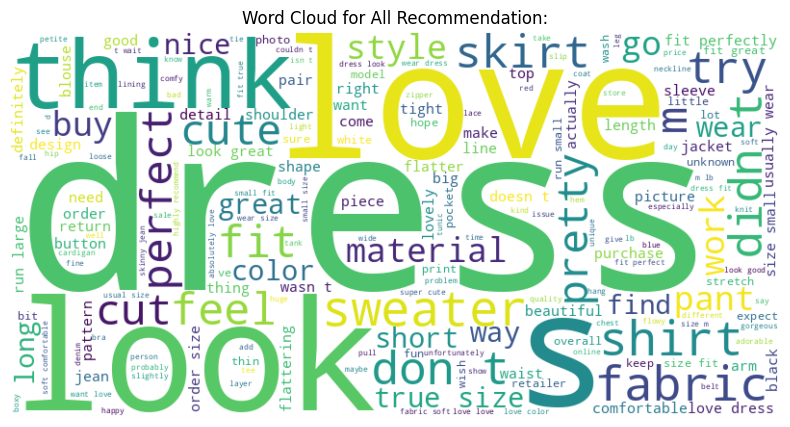

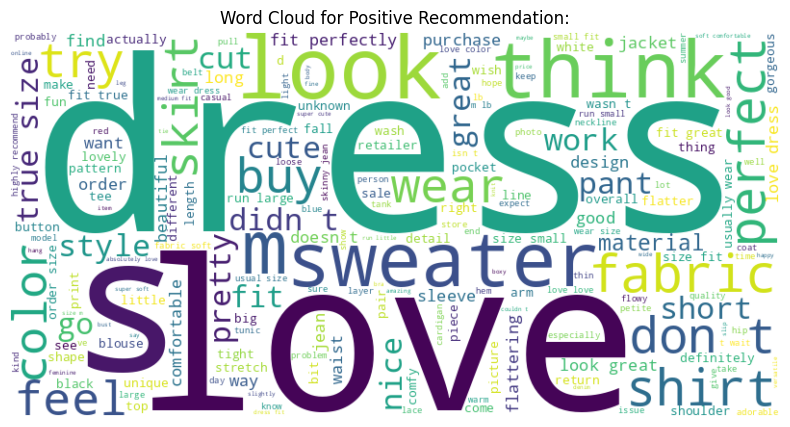

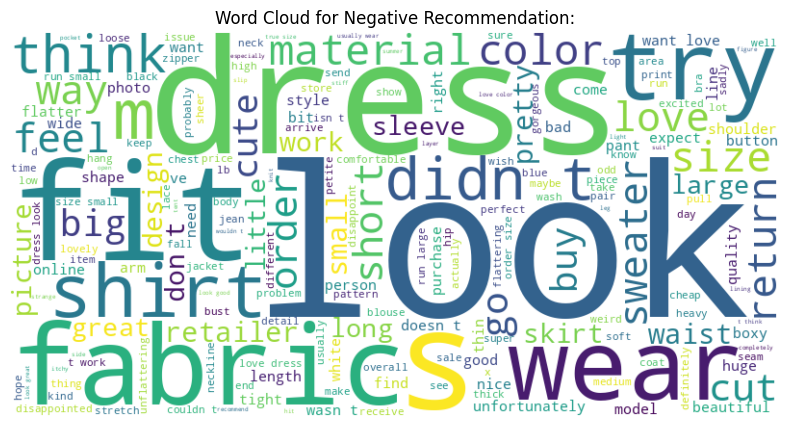

In [ ]:
# Generate and display a word cloud for all processed text to visualize the most frequent words in the entire dataset.
generate_word_cloud(all_text, "Word Cloud for All Recommendation:")

# Generate and display a word cloud for the processed text from positively recommended entries to visualize common positive terms.
generate_word_cloud(positive_text, "Word Cloud for Positive Recommendation:")

# Generate and display a word cloud for the processed text from negatively recommended entries to visualize common negative terms.
generate_word_cloud(negative_text, "Word Cloud for Negative Recommendation:")

### Exploratory Data Analysis: Countplots for Class Distribution

#### Overview
Building the initial exploratory analysis with word clouds,  countplots is employed to visually examine the distribution of categorical data within the dataset. Specifically, focus is on identifying potential class imbalances that could influence subsequent analysis.

#### Steps for Generating Countplots

##### 1. Prepare Visualization Function
First a generic visualization function that can be reused to create countplots for any categorical variable:
- **Flexible Input:** The function should accept any DataFrame along with the specific column to plot,
- **Customization:** Allow for customization of the plot title to reflect the data being analyzed.

##### 2. Visualize Class Distribution
Using the countplot, assess the distribution of key categorical variables:
- **Recommendation Indicator:** Plot the distribution of the 'Recommended IND' column to visualize how many products are generally recommended versus not recommended by customers.
- **Identify Class Imbalance:** The countplot helps in identifying any class imbalance, where one class significantly outweighs the other, which is crucial for preparing balanced training datasets.



#### Conclusion
Countplots provide a clear and immediate understanding of the class distributions within the dataset. This step in exploratory data analysis is critical for preparing the data for further analysis, ensuring that any significant class imbalances are acknowledged and addressed appropriately.

In [ ]:
def visualize_data(df, column_to_plot, title):
    """
    Visualizes the distribution of data in a specified column using a bar chart.

    This function uses Seaborn's countplot to display the frequency distribution of categorical data. It helps in quickly understanding the
    prevalence of different categories within the dataset.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to visualize.
        column_to_plot (str): The name of the column for which the distribution needs to be plotted.
        title (str): The title for the plot.

    Returns:
        None: The function directly displays a plot using matplotlib and does not return any value.

    """
    # Set up the figure size for the plot
    plt.figure(figsize=(10, 7))

    # Create a count plot for the specified column in the DataFrame
    sns.countplot(x=column_to_plot, data=df)  # The x parameter indicates which column to consider for counting

    # Set the title of the plot with the provided title argument
    plt.title(title)

    # Show the plot
    plt.show()


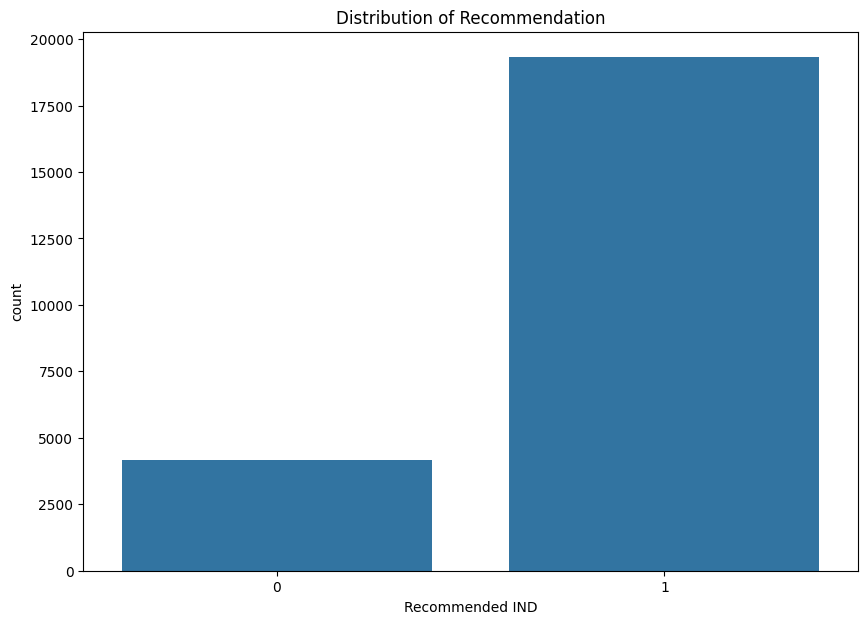

In [ ]:
# Visualize the distribution of user recommendations identify trends and patterns in customer feedback.
visualize_data(df, 'Recommended IND', 'Distribution of Recommendation')

## Data Splitting and Data Imbalance Handling

### Dataset Preparation: Splitting and Analyzing Class Distribution

#### Overview
After identifying class imbalance in the exploratory data analysis phase, it's crucial to prepare the dataset for predictive modeling. This section focuses on splitting the dataset into training and testing sets and then analyzing the class distribution within these subsets.

#### Splitting the Dataset
To ensure that our model is tested on unseen data, the data is split into training and testing sets so that the model's performance can be evaluated more accurately.

##### Steps for Splitting the Dataset

###### 1. Train-Test Split
- **Purpose:** Divide the dataset into a training set and a testing set. The training set is used to train the machine learning model, while the testing set serves to evaluate its performance.
- **Methodology:** Use the `train_test_split` function from scikit-learn, specifying:
  - **Test Size:** 20% of the dataset.
  - **Random State:** ensures that the splits are reproducible.

###### 2. Verify Split
- **Check Distribution:** After splitting, verify that the training and testing sets represent the overall dataset adequately.
- **Output Statistics:** Print the class distribution and proportions within the training set to understand the spread of classes.

###### Analyzing Class Distribution
Post-split, it’s important to assess how the classes are distributed within the training set to address any imbalance effectively.

##### Steps for Analyzing Class Distribution

###### 1. Compute Class Distribution
- **Count Classes:** Calculate how many instances belong to each class in the training dataset (`y_train`).
- **Display Distribution:** Print these counts to get a clear view of the class distribution.

###### 2. Calculate Class Proportions
- **Proportion Calculation:** Divide the number of instances of each class by the total number of instances in the training set to get the proportion of each class.

#### Conclusion
Splitting the dataset and analyzing the class distribution are crucial steps in preparing for effective machine learning modeling. These steps ensure that the model is trained and tested on representative samples of the data, and they lay the groundwork for addressing any class imbalance in the subsequent steps.


In [ ]:
# Split the feature matrix and recommendation indicators into training and testing sets for model training and evaluation.
X_train, X_test, y_train, y_test = train_test_split(X_features, df['Recommended IND'], test_size=0.2, random_state=42)

In [ ]:
# Determine the class distribution in the training data to understand the balance between different classes.
class_distribution = y_train.value_counts()
print("Class distribution in y_train:")
print(class_distribution)

# Calculate the proportion of each class relative to the total number of training samples to assess class imbalance.
class_proportion = class_distribution / len(y_train)
print("\nClass proportion in y_train:")
print(class_proportion)

Class distribution in y_train:
Recommended IND
1    15467
0     3321
Name: count, dtype: int64

Class proportion in y_train:
Recommended IND
1    0.823238
0    0.176762
Name: count, dtype: float64


### Addressing Class Imbalance with SMOTE

#### Overview
Following the observed class imbalance through the Countplot Visualization, through the dataset splitting and analysis, we observed significant class imbalance within the training data. To handle the imbalance, SMOTE will be applied to the training data set which is common practice as opposed to balancing the whole dataset which aligns with the goal of good generalization to new or unseen data and avoiding bias during learning.

#### Applying SMOTE to Balance the Dataset

##### 1. Initialize SMOTE
- **Configuration:** Setting up the SMOTE instance, specifying the random state to ensure reproducibility of the results.

##### 2. Resample the Dataset
- **Apply SMOTE:** Use the `fit_resample` method to adjust the class distribution. This method modifies the feature set (`X_train`) and the target variable (`y_train`) by adding synthetic examples.
- **Output Resampled Distribution:** After resampling, print the new class distribution to verify that the classes have been balanced.

#### Conclusion
Applying SMOTE to the training dataset helps in correcting the class imbalance, which is critical for building effective and unbiased machine learning models. The new, balanced dataset will likely improve the generalization ability of models and ensure that performance metrics are not skewed by an overrepresentation of any class.


In [ ]:

def apply_smote(X_train, y_train):
    """
    Applies SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution in the training dataset.

    Args:
    - X_train (np.array): The feature set for training data, where each row represents a sample and each column represents a feature.
    - y_train (np.array): The target variable for training data, typically a one-dimensional array of class labels.

    Returns:
    - X_resampled (np.array): The feature set after applying SMOTE, now with a balanced class distribution.
    - y_resampled (np.array): The target variable after applying SMOTE, also indicating a balanced class distribution.
    """
    # Initialize a SMOTE object with a random state to ensure reproducible results
    smote = SMOTE(random_state=42)

    # Apply SMOTE to the training data to create a balanced set of data
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Print the class distribution before and after applying SMOTE to demonstrate the balancing effect
    print("Original dataset shape %s" % Counter(y_train))
    print("Resampled dataset shape %s" % Counter(y_resampled))

    return X_resampled, y_resampled

In [ ]:
# Apply SMOTE to balance class distribution in the training data, enhancing model training fairness and accuracy.
X_train_smote, y_train_smote = apply_smote(X_train, y_train)

Original dataset shape Counter({1: 15467, 0: 3321})
Resampled dataset shape Counter({1: 15467, 0: 15467})


### Incorporating Class Weights for Balanced Model Training

#### Overview
In addition to using SMOTE for resampling the train dataset, we also explore the use of class weights to further ensure fairness and balance during model training. Class weights provide a mechanism to penalize misclassifications of the minority class more than those of the majority class.


##### Steps for Computing Class Weights

###### 1. Define Class Weights Computation Function
A function is implemented to calculate class weights based on the distribution of classes:
- **Input:** The target variable after any resampling (`y_resampled`).
- **Weight Strategy:** Allows for either a 'balanced' strategy or custom weights defined by a dictionary.

###### 2. Compute Class Weights
- **Initialization:** Identify all unique classes in the target variable.
- **Determine Weights:** Calculate weights using scikit-learn's `compute_class_weight` function. This function adjusts weights inversely proportional to class frequencies in the input data.
- **Output Weights:** Generate a dictionary mapping each class to its computed weight and a list of these weights corresponding to each instance.

###### 3. Apply Class Weights in Model Training
Integrate the computed class weights during the model training phase:
- **Configuration:** Use the class weights in the training algorithm to adjust the importance of each class.
- **Enhancement of Model Fairness:** By using class weights, the model's sensitivity to the minority class increases, potentially improving model accuracy and fairness.

##### Conclusion
The combination of SMOTE and class weights ensures that our model training processes are robust against the biases inherent in class imbalances.


In [ ]:
def compute_class_weights(y_resampled, weight_strategy='balanced'):
    """
    Computes class weights for the given target variable.

    Args:
    - y_resampled: array-like, the target variable for which weights need to be computed after resampling.
    - weight_strategy: Can be 'balanced' or a dictionary specifying custom weights for classes.

    Returns:
    - class_weights_dict: Dictionary mapping class labels to their respective weights.
    - weights: List of weights corresponding to the instances in y_resampled.
    """
    # Identify unique classes in the target variable
    classes = np.unique(y_resampled)  # Get all unique classes from the target variable

    # Check if a custom weight dictionary is provided or compute weights using a specified strategy
    if isinstance(weight_strategy, dict):
        # Apply custom weights provided by the user
        class_weights_dict = weight_strategy
    else:
        # Compute class weights using a strategy supported by sklearn, typically 'balanced'
        class_weights = compute_class_weight(
            class_weight=weight_strategy,
            classes=classes,
            y=y_resampled
        )
        class_weights_dict = {classes[i]: class_weights[i] for i in range(len(classes))}

    # Create a list of weights for each instance in the dataset, based on the class they belong to
    weights = [class_weights_dict.get(y, 1) for y in y_resampled]  # Default weight is 1 if the class is not in the dictionary

    return class_weights_dict, weights

In [ ]:
# Calculate class weights and individual sample weights for the training data to address class imbalance.
class_weights_dict, weights = compute_class_weights(y_train)

## Baseline Model

### Gaussian Naive Bayes Baseline Model

#### Overview
The Gaussian Naive Bayes (GNB) was used as a baseline model for its simplicity and computational efficiency, providing a preliminary benchmark for the  classification task.

#### Training and Evaluation
- **Training**: The model is fitted to the training data (`X_train`, `y_train`).
- **Prediction**: It predicts class labels and computes probabilities for the test set (`X_test`).

#### Performance Metrics
- **Metrics Computed**: Accuracy, Precision, Recall, F1 Score, and ROC-AUC.
- **Display Results**: Outputs include accuracy and ROC-AUC scores to assess model effectiveness.



In [ ]:
# Initialize the Gaussian Naive Bayes classifier.
model = GaussianNB()

# Fit the Gaussian Naive Bayes model on the training data.
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict outcomes and calculate probabilities using the trained Gaussian Naive Bayes model.
y_pred = model.predict(X_test)  # Make predictions on the test dataset.
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Calculate the probability estimates for the positive class.

# Evaluate the model's performance using various metrics.
accuracy = accuracy_score(y_test, y_pred)  # Proportion of correctly predicted observations.
precision = precision_score(y_test, y_pred)  # Ratio of correctly predicted positive observations to the total predicted positives.
recall = recall_score(y_test, y_pred)  # Ratio of correctly predicted positive observations to all actual positives.
f1 = f1_score(y_test, y_pred)  # Weighted average of Precision and Recall.
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Area under the ROC curve, a performance measurement for classification problems.

# Print performance metrics to understand the effectiveness of the model.
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.6306939123031077
Precision: 0.9381742738589212
Recall: 0.5877306992461658
F1 Score: 0.7227105641681317
ROC-AUC: 0.7304069250475824


## Traditional Models

### Model Training and Evaluation

#### Overview
Having prepared and balanced the dataset and seen the performance of the baseline models, the next phase involves training machine learning models and evaluating their performance. This section describes the methods used to train classifiers and assess their accuracy, precision, recall, and other key metrics.

#### Training Classifiers

##### Function for Training
A function  which provides the flexibility of training various classifier models is defined:

- **Parameters:**
  - `X_train` and `y_train`: Training features and labels.
  - `classifier`: The type of classifier to train, with a default of RandomForestClassifier.
  - `random_state`: Ensures reproducibility of results.
  - `**kwargs`: Allows passing other classifier-specific parameters.
- **Process:**
  - The classifier is instantiated with the specified parameters and fitted to the training data.
- **Output:**
  - The function returns the trained classifier instance.

#### Evaluation

##### Overview
This function uses the classifier passed to it to predict labels for the test set, then generates and displays a classification report, a confusion matrix and ROC-AUC score


#### Evaluation Function Details

##### Features
- **Predictive Accuracy**: Predicts labels and probabilities for the test dataset to assess accuracy and calculate ROC-AUC.
- **Metrics**: Outputs a classification report detailing precision, recall, F1-score, and a confusion matrix visualized through a heatmap.
- **ROC-AUC Calculation**:
  - **Binary Classification**: Computes ROC-AUC using probabilities for the positive class.
  - **Multi-Class Classification**: Utilizes a one-vs-rest approach for ROC-AUC, averaging across classes.


In [ ]:
def train_classifier(X_train, y_train, classifier=RandomForestClassifier, random_state=42, **kwargs):
    """
    Train a classifier with optional keyword arguments for handling class weights and other classifier-specific parameters.

    Args:
        X_train (array-like): Training features.
        y_train (array-like): Training labels.
        classifier (class, optional): Classifier class to instantiate. Defaults to RandomForestClassifier.
        random_state (int, optional): Random state for reproducibility. Defaults to 42.
        **kwargs: Arbitrary keyword arguments for classifier instantiation.

    Returns:
        object: Trained classifier instance.
    """
    # Initialize the classifier with any additional parameters and a fixed random state for reproducibility
    clf = classifier(random_state=random_state, **kwargs)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Return the trained classifier ready for making predictions
    return clf

In [ ]:
def evaluate_classifier(clf, X_test, y_test, labels=None):
    """
    Evaluates the performance of a trained classifier on a test dataset.

    This function uses the classifier passed to it to predict labels for the test set, then generates and displays
    a classification report and a confusion matrix.

    Args:
        clf (classifier): The trained classifier to evaluate.
        X_test (array-like): Test features, should be in the same format as training features.
        y_test (array-like): True labels for the test data.
        labels (list, optional): List of label names corresponding to integer classes, used for better visualization.

    """
    # Predict the responses for the test dataset using the trained classifier
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)  # Ensure your model has a predict_proba function

    # Print the classification report, which includes precision, recall, f1-score, and support
    print("Classification Report for the Model:")
    print(classification_report(y_test, y_pred, target_names=labels))

    # Prepare labels for the confusion matrix if not provided
    if labels is None:
        labels = sorted(set(y_test))  # Automatically determine the labels from the test data

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)  # Use seaborn to create a heatmap
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    # Set the tick labels on the confusion matrix
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()


    # Calculate ROC-AUC
    if len(labels) == 2:  # Binary classification
        roc_auc = roc_auc_score(y_test, y_score[:, 1])  # The score for the positive class
    else:  # Multiclass classification
        y_test_binarized = label_binarize(y_test, classes=range(len(labels)))
        roc_auc = roc_auc_score(y_test_binarized, y_score, multi_class='ovr', average='macro')

    print("ROC-AUC Score:", roc_auc)
    return roc_auc

### Random Forest

#### Model Training and Evaluation with Different Balancing Strategies

##### Overview
After setting up the training and evaluation functions, the next step involves training the Random Forest classifier using various strategies to manage class imbalance. This experiment will help determine the most effective approach for balancing the dataset, guiding further model optimization.

##### Training Strategies
To address class imbalance and identify the best performing model, the following strategies are employed:

###### 1. Training with Unbalanced Training Data
- **Description:** First, train the model using the original, unbalanced training data. This serves as a baseline to understand the impact of imbalance on model performance.

###### 2. Training with SMOTE Data
- **Description:** Use the training data balanced by SMOTE (Synthetic Minority Over-sampling Technique) to train another model.

###### 3. Using Class Weights with 'Balanced' Strategy
- **Description:** Implement class weights calculated with the 'balanced' strategy, which automatically adjusts weights inversely proportional to class frequencies in the input data.

###### 4. Using Custom Class Weights
- **Description:** Experiment with several sets of custom class weights to see how different weight adjustments affect model performance. The weights to be tested include:
  - `{0: 20, 1: 1}`
  - `{0: 10, 1: 1}`
  - `{0: 100, 1: 1}`
  - `{0: 50, 1: 1}`
- **Objective:** These weights significantly increase the penalty for misclassifying the minority class, aiming to reduce false negatives.

##### Evaluation Metrics
Each model trained using the above strategies will be evaluated based on:
- **Precision, Recall, and F1-Score:** To assess each model’s accuracy and its ability to handle imbalanced data effectively.
- **Confusion Matrix:** Provides a visual comparison of the model's predictions against the actual labels.

##### Implementation
- **Training Phase:** Each model is trained using the `train_classifier` function with the respective balancing strategy applied.
- **Evaluation Phase:** The `evaluate_classifier` function is used to assess and compare the performance of each model.

##### Conclusion
By comparing the effectiveness of different strategies for handling class imbalance, we can select the most suitable approach for further model fine-tuning.


#### Unbalanced Dataset

In [ ]:
# Train a RandomForestClassifier with specific hyperparameters on the training data to create a predictive model.
rf_model = train_classifier(
    X_train,
    y_train,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Specify the number of trees in the forest
    max_depth=10       # Set the maximum depth of the trees to prevent overfitting
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       1.00      0.00      0.00       851
    Recommended       0.82      1.00      0.90      3847

       accuracy                           0.82      4698
      macro avg       0.91      0.50      0.45      4698
   weighted avg       0.85      0.82      0.74      4698



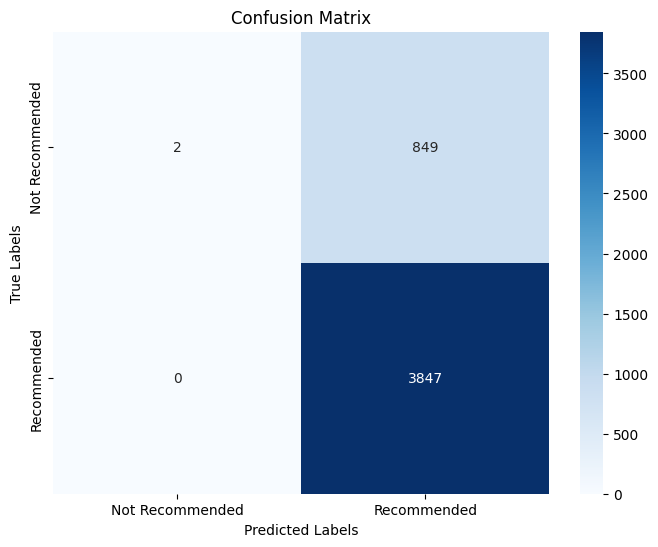

ROC-AUC Score: 0.8884216095255753


0.8884216095255753

In [ ]:
labels = ['Not Recommended', 'Recommended']
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
evaluate_classifier(rf_model, X_test, y_test, labels=labels)

#### With Smote

In [ ]:
# Train a RandomForestClassifier on the SMOTE-balanced training data to improve model fairness and accuracy with hyperparameters set for tree depth and count.
rf_model = train_classifier(
    X_train_smote,
    y_train_smote,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Specify the number of trees in the forest
    max_depth=10       # Set the maximum depth of the trees to prevent overfitting
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.57      0.58      0.58       851
    Recommended       0.91      0.90      0.90      3847

       accuracy                           0.84      4698
      macro avg       0.74      0.74      0.74      4698
   weighted avg       0.85      0.84      0.85      4698



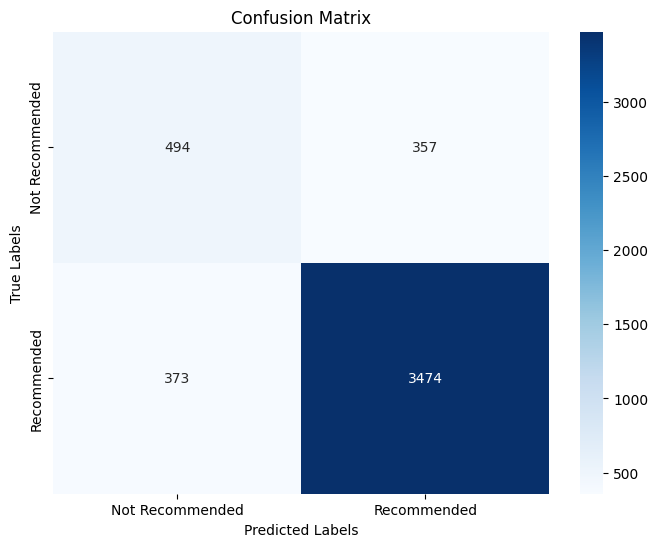

ROC-AUC Score: 0.8736433566284042


0.8736433566284042

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']
evaluate_classifier(rf_model, X_test, y_test, labels=labels)

#### Balanced weights

In [ ]:
# Train a Random Forest Classifier with balanced class weights to address class imbalance directly within the model settings.
rf_model = train_classifier(
    X_train,
    y_train,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Specify the number of trees in the forest
    class_weight='balanced',  # Adjust weights inversely proportional to class frequencies
    max_depth=10  # # Set the maximum depth of the trees to prevent overfitting
)


Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.47      0.77      0.59       851
    Recommended       0.94      0.81      0.87      3847

       accuracy                           0.80      4698
      macro avg       0.71      0.79      0.73      4698
   weighted avg       0.86      0.80      0.82      4698



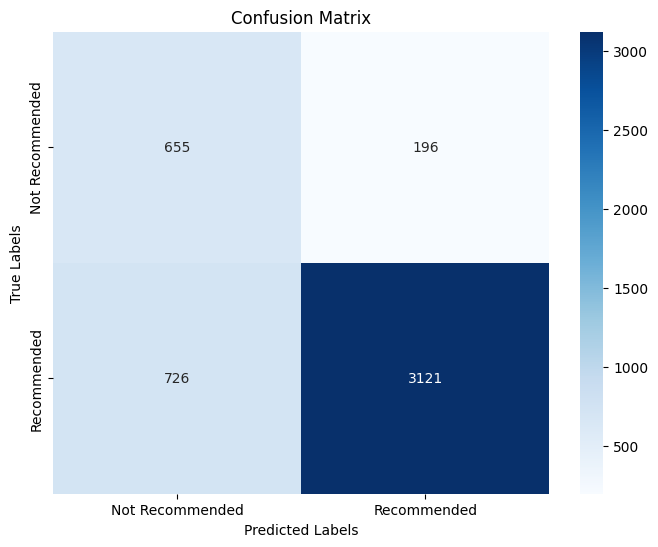

ROC-AUC Score: 0.8855880495950116


0.8855880495950116

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']

evaluate_classifier(rf_model, X_test, y_test, labels=labels)

#### custom_weights = {0: 20, 1: 1}

In [ ]:
# Define custom class weights to address significant class imbalance specifically tailored to the dataset's characteristics.
custom_weights = {0: 20, 1: 1}  # Class 0 is significantly underrepresented.

# Compute class weights based on the provided custom weights dictionary to ensure fairness in model training.
class_weights_dict, weights = compute_class_weights(y_train, weight_strategy=custom_weights)

# Train a Random Forest Classifier using the custom class weights to help the model better learn from the underrepresented class.
rf_model = train_classifier(
    X_train,
    y_train,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Number of trees in the forest
    class_weight=class_weights_dict, # Apply the custom class weights
    max_depth=10 # Set the maximum depth of the trees to prevent overfitting
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.18      1.00      0.31       851
    Recommended       1.00      0.01      0.02      3847

       accuracy                           0.19      4698
      macro avg       0.59      0.51      0.17      4698
   weighted avg       0.85      0.19      0.07      4698



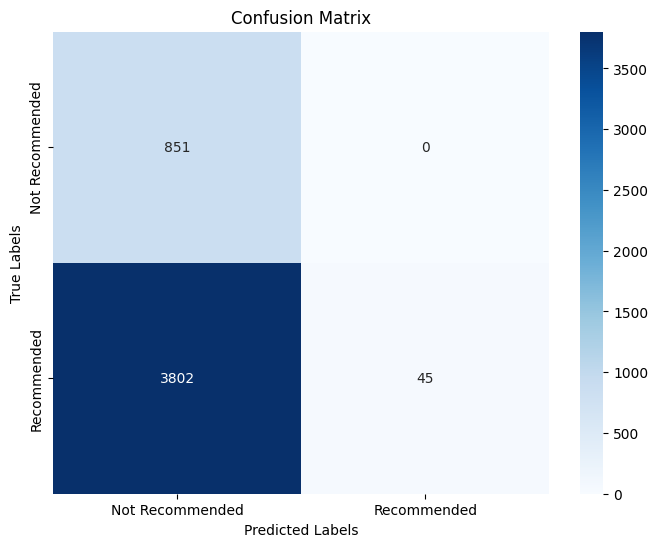

ROC-AUC Score: 0.8618914062173066


0.8618914062173066

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.

labels = ['Not Recommended', 'Recommended']

evaluate_classifier(rf_model, X_test, y_test, labels=labels)

#### custom_weights = {0: 10, 1: 1}

In [ ]:
# Define custom class weights to address significant class imbalance specifically tailored to the dataset's characteristics.
custom_weights = {0: 10, 1: 1}  # Class 0 is significantly underrepresented.

# Compute class weights based on the provided custom weights dictionary to ensure fairness in model training.
class_weights_dict, weights = compute_class_weights(y_train, weight_strategy=custom_weights)

# Train a Random Forest Classifier using the custom class weights to help the model better learn from the underrepresented class.
rf_model = train_classifier(
    X_train,
    y_train,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Number of trees in the forest
    class_weight=class_weights_dict, # Apply the custom class weights
    max_depth=10 # Set the maximum depth of the trees to prevent overfitting
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.20      1.00      0.34       851
    Recommended       0.99      0.13      0.24      3847

       accuracy                           0.29      4698
      macro avg       0.60      0.57      0.29      4698
   weighted avg       0.85      0.29      0.26      4698



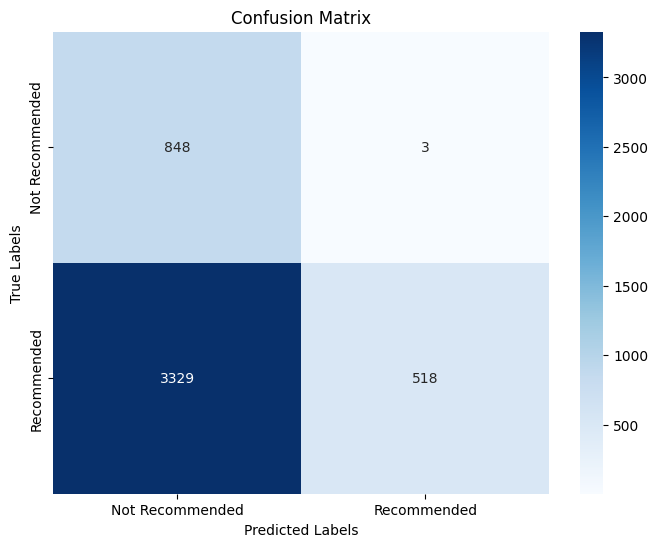

ROC-AUC Score: 0.8766534699616378


0.8766534699616378

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']
evaluate_classifier(rf_model, X_test, y_test, labels=labels)

#### custom_weights = {0: 100, 1: 1}

In [ ]:
# Define custom class weights to address significant class imbalance specifically tailored to the dataset's characteristics.
custom_weights = {0: 100, 1: 1}  # Class 0 is significantly underrepresented.

# Compute class weights based on the provided custom weights dictionary to ensure fairness in model training.
class_weights_dict, weights = compute_class_weights(y_train, weight_strategy=custom_weights)

# Train a Random Forest Classifier using the custom class weights to help the model better learn from the underrepresented class.
rf_model = train_classifier(
    X_train,
    y_train,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Number of trees in the forest
    class_weight=class_weights_dict, # Apply the custom class weights
    max_depth=10 # Set the maximum depth of the trees to prevent overfitting
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.18      1.00      0.31       851
    Recommended       0.00      0.00      0.00      3847

       accuracy                           0.18      4698
      macro avg       0.09      0.50      0.15      4698
   weighted avg       0.03      0.18      0.06      4698



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


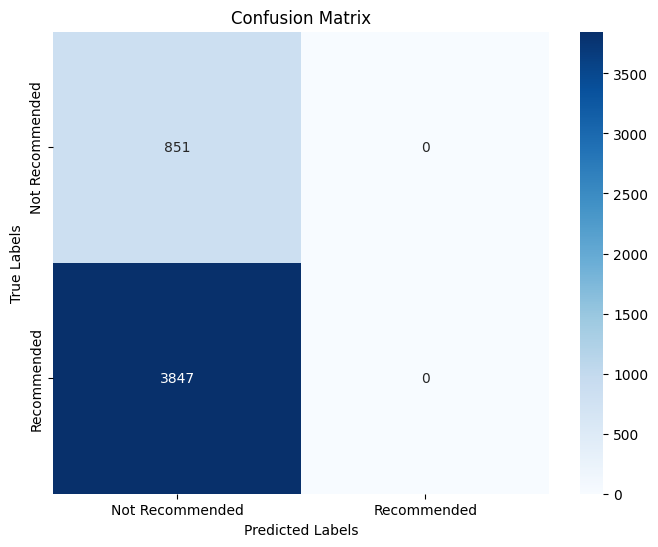

ROC-AUC Score: 0.816900834107918


0.816900834107918

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.

labels = ['Not Recommended', 'Recommended']

evaluate_classifier(rf_model, X_test, y_test, labels=labels)

#### custom_weights = {0: 50, 1: 1}

In [ ]:
# Define custom class weights to address significant class imbalance specifically tailored to the dataset's characteristics.
custom_weights = {0: 50, 1: 1}  # Class 0 is significantly underrepresented.

# Compute class weights based on the provided custom weights dictionary to ensure fairness in model training.
class_weights_dict, weights = compute_class_weights(y_train, weight_strategy=custom_weights)

# Train a Random Forest Classifier using the custom class weights to help the model better learn from the underrepresented class.
rf_model = train_classifier(
    X_train,
    y_train,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Number of trees in the forest
    class_weight=class_weights_dict, # Apply the custom class weights
    max_depth=10 # Set the maximum depth of the trees to prevent overfitting
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.18      1.00      0.31       851
    Recommended       1.00      0.00      0.00      3847

       accuracy                           0.18      4698
      macro avg       0.59      0.50      0.15      4698
   weighted avg       0.85      0.18      0.06      4698



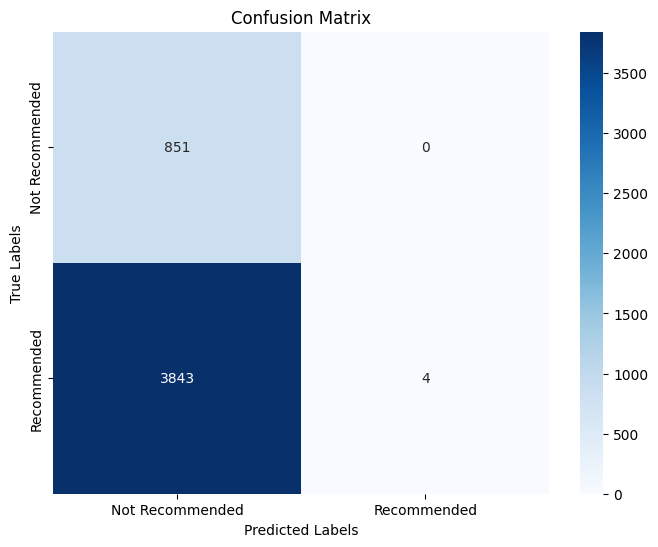

ROC-AUC Score: 0.8354125194689835


0.8354125194689835

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.

labels = ['Not Recommended', 'Recommended']

evaluate_classifier(rf_model, X_test, y_test, labels=labels)

### XGBoost

#### Training and Evaluating XGBoost with Different Balancing Strategies

##### Overview
Following the evaluation of Random Forest models under various class balancing strategies, we apply similar techniques to train and evaluate an XGBoost model. XGBoost is known for its performance and efficiency in handling imbalanced datasets, making it a suitable choice for further exploration.

##### XGBoost Training Strategies
Leveraging the insights gained from Random Forest evaluations, the XGBoost model will be trained using three main strategies to address class imbalance:

###### 1. Training with Unbalanced Training Data

###### 2. Training with SMOTE Data

###### 3. Using Scale Factor Balancing

##### Evaluation Metrics
The XGBoost model will be assessed using the same criteria as the previous models:
- **Precision, Recall, and F1-Score:** These metrics will determine the effectiveness of each strategy in handling class imbalance.
- **Confusion Matrix:** Visual representation of the model’s performance, highlighting the accuracy of predictions against the actual labels.

##### Implementation
- **Training Phase:** Each model variant is trained using the adapted strategies to see how XGBoost handles imbalanced data.
- **Evaluation Phase:** Performance is systematically evaluated to compare the outcomes of the different strategies and determine the best approach for this specific algorithm.

#### Conclusion
The application of these strategies to XGBoost allows for a direct comparison with the Random Forest outcomes, providing insights into which techniques are most effective for enhancing model performance in the presence of class imbalance.


#### Unbalanced Dataset

In [ ]:
# Train an XGBClassifier with GPU acceleration (if available) and specific settings to optimize performance and computational efficiency.
xgb_model = train_classifier(
    X_train,
    y_train,
    classifier=XGBClassifier,
    use_label_encoder=False,  # Avoid using label encoder to handle any non-numeric labels properly
    tree_method='hist',       # Opt for histogram-based method for faster computation
    device='cuda'             # Utilize CUDA on GPU for enhanced training speed
)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:45:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.73      0.50      0.59       851
    Recommended       0.90      0.96      0.93      3847

       accuracy                           0.88      4698
      macro avg       0.81      0.73      0.76      4698
   weighted avg       0.87      0.88      0.87      4698



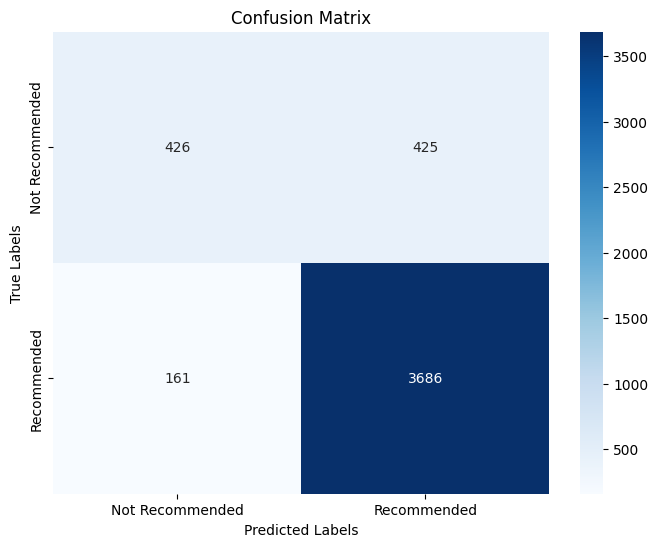

ROC-AUC Score: 0.9051425607635415


0.9051425607635415

In [ ]:
# Evaluate the model's performance on the test set using predefined labels for clarity in the results.
evaluate_classifier(xgb_model, X_test, y_test, labels=labels)

#### with smote

In [ ]:
# Train an XGBoost classifier on SMOTE-balanced training data to improve handling of class imbalance with GPU acceleration for efficiency.
xgb_model = train_classifier(
    X_train_smote,
    y_train_smote,
    classifier=XGBClassifier,
    use_label_encoder=False,  # Avoid using label encoder to handle any non-numeric labels properly
    tree_method='hist',       # Opt for histogram-based method for faster computation
    device='cuda'             # Utilize CUDA on GPU for enhanced training speed
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.68      0.58      0.63       851
    Recommended       0.91      0.94      0.92      3847

       accuracy                           0.87      4698
      macro avg       0.79      0.76      0.78      4698
   weighted avg       0.87      0.87      0.87      4698



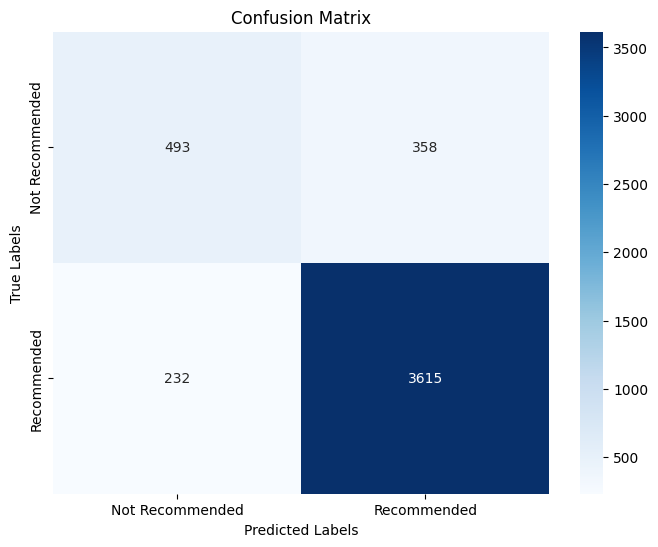

ROC-AUC Score: 0.8996858998893335


0.8996858998893335

In [ ]:
# Evaluate the model's performance on the test set using predefined labels for clarity in the results.
evaluate_classifier(xgb_model, X_test, y_test, labels=labels)

#### with weight balancing

In [ ]:
# Calculate the scale factor to balance classes during training of the XGBoost model.
class_counts = np.bincount(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]  # Ratio of negative to positive samples.

xgb_model = train_classifier(
    X_train,
    y_train,
    classifier=XGBClassifier,
    use_label_encoder=False,  # Avoid using label encoder to handle any non-numeric labels properly
    tree_method='hist',       # Opt for histogram-based method for faster computation
    device='cuda',             # Utilize CUDA on GPU for enhanced training speed
    scale_pos_weight=scale_pos_weight  # Apply the computed class weight to balance class impact
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.56      0.76      0.64       851
    Recommended       0.94      0.87      0.90      3847

       accuracy                           0.85      4698
      macro avg       0.75      0.81      0.77      4698
   weighted avg       0.87      0.85      0.86      4698



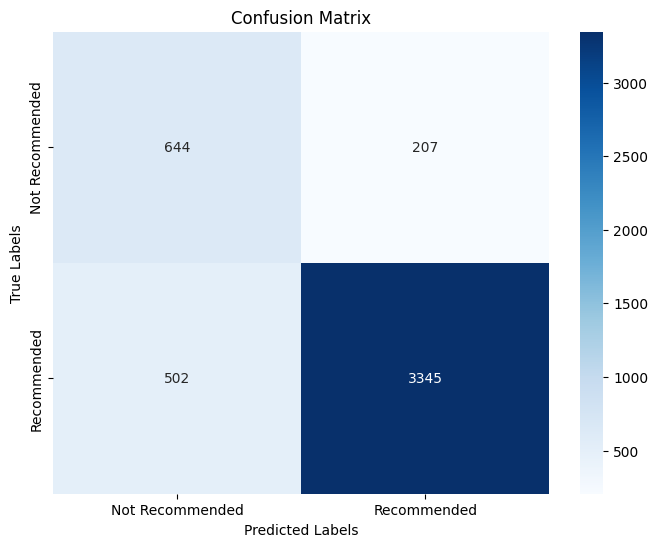

ROC-AUC Score: 0.9081807760224596


0.9081807760224596

In [ ]:
# Evaluate the model's performance on the test set using predefined labels for clarity in the results.
evaluate_classifier(xgb_model, X_test, y_test, labels=labels)

## Traditional Model Fine Tuning

### Fine-Tuning Machine Learning Models

#### Overview
Fine-tuning the traditional models involved three key strategies: hyperparameter tuning, regularization, and data augmentation. To facilitate the hyperparameter tuning, a dedicated function for hyperparameter tuning will be utilized.

#### Function for Hyperparameter Tuning

##### Purpose
Hyperparameter tuning is designed to optimize the model's parameters to achieve the best possible performance. This is typically accomplished using a method like GridSearchCV, which systematically tests a range of configurations.

##### Function Definition

###### Parameters
- **classifier**: Accepts either a classifier class (like `RandomForestClassifier` or `XGBClassifier`) or an instance of a classifier.
- **param_grid**: A dictionary specifying the parameters to test and the range of values for each parameter.
- **X_train, y_train**: Training data features and labels.
- **cv**: Number of cross-validation folds to use for assessing the performance of each parameter set.
- **scoring**: Metric used to evaluate the models during tuning (default is 'accuracy').
- **verbose**: Controls the verbosity of the grid search output.
- **random_state**: Ensures reproducibility of the results.
- **n_jobs**: Determines the number of CPU cores to use for parallel processing (default is -1, which uses all available cores).

###### Process
- **Initialization**: If a class is provided for the classifier, it is instantiated with `random_state` if applicable.
- **Grid Search Setup**: A `GridSearchCV` object is created with the specified parameters and fitting options.
- **Model Fitting**: The grid search is executed using the training data, searching for the best parameter combination based on the specified scoring metric.
- **Output**: The function outputs the best parameters found and the score of the model with these parameters.

###### Output
- **Best Estimator**: The function returns the best model configuration found during the grid search.

#### Application
This function will be employed to fine-tune models using:
1. **Hyperparameter Tuning**: Systematic testing of parameter combinations.
2. **Regularization Techniques**: To prevent overfitting and ensure generalization.

#### Conclusion
Using this hyperparameter tuning function allows for a structured approach to model optimization. This function will serve as a foundation for the subsequent fine-tuning strategies.

Next is to proceed with the actual fine-tuning process, applying this function to our models to explore and identify the most effective configurations.


In [ ]:
def tune_classifier(classifier, param_grid, X_train, y_train, cv=5, scoring='accuracy', verbose=1, random_state=None, n_jobs=-1):
    """
    Performs hyperparameter tuning for a given classifier using GridSearchCV.

    Args:
        classifier (class or instance): The classifier class or an instance from scikit-learn or compatible libraries (e.g., XGBClassifier).
        param_grid (dict): Dictionary with parameter names as keys and lists of parameter settings to try.
        X_train (array-like): Training data features.
        y_train (array-like): Training data labels.
        cv (int, optional): Number of cross-validation folds. Defaults to 5.
        scoring (str, optional): Metric to evaluate the models. Defaults to 'accuracy'.
        verbose (int, optional): Controls the verbosity of the search. Defaults to 1.
        random_state (int, optional): Random state for reproducibility. Defaults to None.
        n_jobs (int, optional): Number of jobs to run in parallel. Defaults to -1 (use all processors).

    Returns:
        The best estimator found by the grid search.
    """
    if isinstance(classifier, type):
        # If 'classifier' is a class, initialize it possibly with random_state
        if 'random_state' in classifier().get_params():
            clf = classifier(random_state=random_state)
        else:
            clf = classifier()
    else:
        # If 'classifier' is an instance, use it directly
        clf = classifier

    # Create the GridSearchCV object with n_jobs to parallelize search
    grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, verbose=verbose, n_jobs=n_jobs)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Output the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Return the best model
    return grid_search.best_estimator_


### Random Forest

####  Fine-Tuning Random Forest Classifier

#####  Overview
The Random Forest classifier is fine-tuned to optimize its performance for the task at hand. This process involves exploring a range of hyperparameters to determine the best configuration for balancing accuracy and computational efficiency.

#####  Tuning the Random Forest Classifier

######  Setup for Hyperparameter Tuning
To fine-tune the Random Forest classifier, we initiate with a base model and define a comprehensive parameter grid to explore various combinations:

- **Base Model Configuration:**
  - `random_state`: Ensures consistency in the results by controlling the randomness during bootstrapping of the samples used in building trees.

######  Parameter Grid Definition
The parameter grid specifies the hyperparameters to vary during the tuning process:

- **Parameters to Tune:**
  - `n_estimators`: The number of trees in the forest. Several options are considered to see the effect of the forest size on performance.
  - `max_depth`: The maximum depth of each tree. Includes several levels and `None` to allow trees to expand until all leaves are pure or until all leaves contain less than the `min_samples_split` samples.
  - `min_samples_split`: Minimum number of samples required to split an internal node. Testing different values helps in preventing overfitting.
  - `max_features`: The number of features to consider when looking for the best split. This parameter is crucial as it influences the diversity of the trees in the forest.

######  Grid Search Execution
- **Process:** Utilize the `tune_classifier` function, passing the RandomForest model, parameter grid, and training data.
- **Goal:** Identify the optimal combination of parameters that yields the best performance based on the training data, particularly considering the balanced dataset via SMOTE.

######  Evaluation of Tuned Model
- **Model Selection:** The best performing model from the grid search is selected based on its accuracy score during cross-validation.
- **Output Parameters:** The best parameters are reported, providing transparency into what configurations lead to the most effective model.

#####  Conclusion
Following this fine-tuning process, the best parameters identified will be incorporated into further regularization strategies to enhance the model’s stability and prevent overfitting, thereby ensuring the model's performance remains consistent across different data scenarios.


#### Hyper Parameter Tuning

In [ ]:
# Initialize a RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up a parameter grid for hyperparameter tuning of the RandomForest model to optimize its performance.
param_grid_rf1 = {
    'n_estimators': [100, 200, 300],  # Vary the number of decision trees in the forest.
    'max_depth': [10, 15, 20, None],  # Test trees of various depths, from shallow to potentially unlimited.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node.
    'max_features': ['auto', 'sqrt', 'log2']  # Different strategies for the number of features to consider for splits.
}

# Conduct a grid search to find the best parameters for the RandomForest model using the specified parameter grid.
# The search uses SMOTE-balanced training data to ensure class balance is considered.
best_model_rf1 = tune_classifier(
    rf_model,
    param_grid_rf1,
    X_train_smote,
    y_train_smote,
    random_state=42  # Ensure reproducibility in model training
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9493444662580316


Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.77      0.41      0.54       851
    Recommended       0.88      0.97      0.93      3847

       accuracy                           0.87      4698
      macro avg       0.83      0.69      0.73      4698
   weighted avg       0.86      0.87      0.86      4698



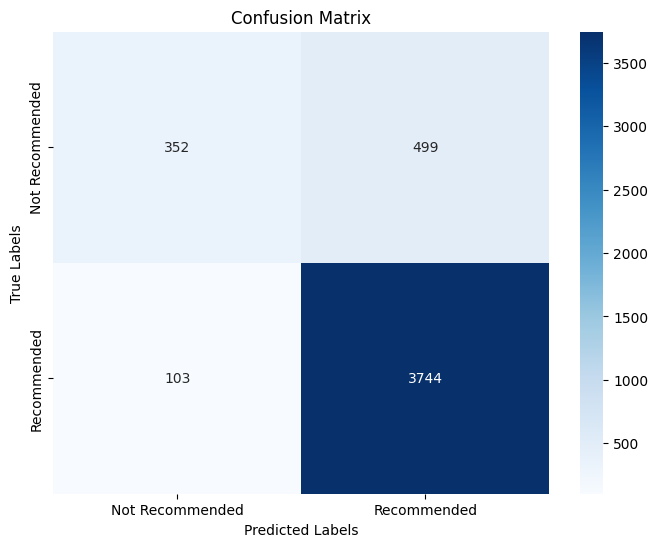

ROC-AUC Score: 0.9062600704930697


0.9062600704930697

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.

labels = ['Not Recommended', 'Recommended']

evaluate_classifier(best_model_rf1, X_test, y_test, labels=labels)

#### Regularization of the Random Forest Classifier

##### Overview
Following the successful hyperparameter tuning of the Random Forest model, we transition to the regularization phase. Regularization techniques are employed to further optimize the model's performance by preventing overfitting and ensuring the model's generalization ability on unseen data.

#####  Implementing Regularization

###### Tuned Parameters Integration
From the hyperparameter tuning phase, the best parameters identified were:
- `max_depth`: None
- `max_features`: 'log2'
- `min_samples_split`: 2
- `n_estimators`: 300
- **Best Score Achieved**: 0.9493444662580316

These parameters provided the best balance between model complexity and performance during the tuning process.

###### Additional Regularization Techniques
To enhance the model's robustness and reduce the risk of overfitting, we adjust the following parameters:
- **Set Maximum Depth**: Although the best `max_depth` was found to be `None`, setting a specific limit helps in controlling the growth of trees and makes them simpler. This can be particularly effective in improving the model's generalizability. Hence, `max_depth` is set to 20.
- **Increase Minimum Samples per Leaf**: By requiring at least two samples at each leaf node (`min_samples_leaf=2`), the model is encouraged to make more general decisions, reducing the granularity of the leaf nodes.

###### Training the Regularized Model
Using the `train_classifier` function, the Random Forest model is trained with these adjusted parameters alongside those identified as optimal during the tuning phase:
- `n_estimators`: 300 (Number of trees)
- `max_features`: 'log2' (Type of feature selection)
- `min_samples_split`: 2 (Minimum samples required to split a node)
- `min_samples_leaf`: 2 (Minimum samples at each leaf node)
- `max_depth`: 20 (Maximum depth of each tree)
- `random_state`: 42 (Ensures reproducibility)

##### Conclusion
The application of both hyperparameter tuning and additional regularization techniques is expected to yield a well-tuned, robust Random Forest classifier. The final model is anticipated to perform effectively across diverse scenarios, maintaining high accuracy while being resilient to variations in the data.




In [ ]:
# Train a RandomForest model using the best parameters from grid search and additional regularization to prevent overfitting.
rf_model = train_classifier(
    X_train_smote,  # SMOTE-balanced training data to address class imbalance
    y_train_smote,
    classifier=RandomForestClassifier,
    n_estimators=300,              # Optimal number of trees found in grid search
    max_depth=20,                  # Limit tree depth to 20 to reduce model complexity and enhance generalization
    min_samples_split=2,           # Minimum number of samples required to split a node, as per grid search
    min_samples_leaf=2,            # Further refine the leaf size for better generalization
    max_features='log2',           # Best feature split strategy from grid search
    random_state=42                # Ensure reproducibility in model outputs
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.64      0.53      0.58       851
    Recommended       0.90      0.94      0.92      3847

       accuracy                           0.86      4698
      macro avg       0.77      0.73      0.75      4698
   weighted avg       0.85      0.86      0.86      4698



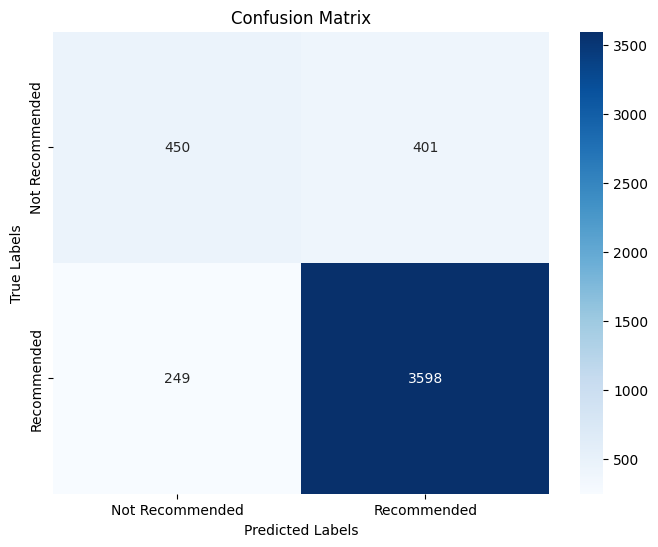

ROC-AUC Score: 0.8952079191226578


0.8952079191226578

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']

evaluate_classifier(rf_model, X_test, y_test, labels=labels)



#### Data Augmentation for Random Forest Classifier

##### Overview
In this phase, we use synonym replacement to augment the text data, which can help the model learn from a broader set of linguistic expressions and potentially improve its ability to generalize.

##### Data Augmentation Process

###### 1. Text Augmentation Using Synonyms
- **Tool Used**: We employ a synonym augmenter from the `nlpaug` library, which utilizes WordNet to find synonyms.
- **Application**: The augmenter is applied to the 'processed_text' column of the dataset to generate new textual data by replacing words with their synonyms.

###### 2. Feature Extraction from Augmented Texts
- **Conversion to Features**: After augmenting the text, the next step involves converting these texts back into features. This is done using the same TF-IDF vectorization process that was applied to the original data.
- **Feature Set**: This creates a new feature matrix `Aug_features` from the augmented texts.

###### 3. Splitting the Augmented Dataset
- **Training and Testing Sets**: The augmented feature set is then split into training and testing datasets using `train_test_split`, maintaining the same test size and random state to ensure comparability with previous experiments.

###### 4. Model Training on Augmented Data
- **Training**: A Random Forest model is trained using the augmented training data. This model is configured with parameters identified as optimal in earlier tuning stages.
- **Evaluation**: The performance of the model trained on augmented data is evaluated to understand the impact of data augmentation on model accuracy and robustness.

###### 5. Balancing Augmented Data Using SMOTE
- **SMOTE Application**: To address any remaining imbalance, SMOTE is applied to the augmented training data.
- **Re-training**: The model is then re-trained on this SMOTE-balanced augmented dataset to compare how balancing affects the model's performance post-augmentation.

###### 6. Evaluation of Models
- **Metrics Used**: Models are evaluated based on precision, recall, F1-score, and accuracy.
- **Confusion Matrix**: The results are visually represented through confusion matrices to illustrate the performance differences clearly.

##### Conclusion
Data augmentation and subsequent balancing with SMOTE provide a comprehensive approach to enhancing the training dataset for the Random Forest classifier. By comparing models trained on original, augmented, and SMOTE-balanced augmented datasets, we can identify the most effective strategy for improving model performance.

##### Unbalanced dataset

In [ ]:
# Initialize a synonym augmenter using WordNet to enhance the diversity of the training text.
augmenter = naw.SynonymAug(aug_src='wordnet')

# Apply the synonym augmenter to each piece of processed text to generate augmented versions.
augmented_texts = [augmenter.augment(text) for text in df['processed_text']]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Convert augmented texts into TF-IDF vectors and combine with the sentiment scores as earlier done
Aug_features = tfidf_vectorize(df, 'processed_text')

# Split the augmented TF-IDF features into training and testing sets to ensure the model can be validated independently.
# This step uses 20% of the data for testing, which helps in evaluating the model's performance on unseen data.
Aug_train, Aug_test, y_train_aug, y_test_aug = train_test_split(Aug_features, df['Recommended IND'], test_size=0.2, random_state=42)


In [ ]:
# Train a RandomForest model on the augmented training data to potentially enhance model robustness.
rf_model = train_classifier(
    Aug_train,
    y_train_aug,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Specifies the number of decision trees in the forest
    max_depth=10        # Limits the complexity of the decision trees
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       1.00      0.00      0.00       851
    Recommended       0.82      1.00      0.90      3847

       accuracy                           0.82      4698
      macro avg       0.91      0.50      0.45      4698
   weighted avg       0.85      0.82      0.74      4698



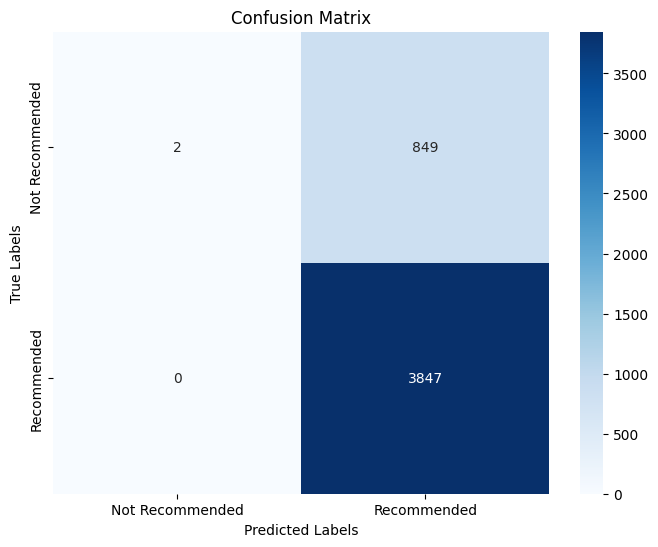

ROC-AUC Score: 0.8884216095255753


0.8884216095255753

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']

evaluate_classifier(rf_model, Aug_test, y_test_aug, labels=labels)

##### Smoothened Data

In [ ]:
# Apply SMOTE to the augmented training data to address class imbalance in the augmented data.
Aug_train_smote, y_train_aug_smote = apply_smote(Aug_train, y_train_aug)

Original dataset shape Counter({1: 15467, 0: 3321})
Resampled dataset shape Counter({1: 15467, 0: 15467})


In [ ]:
# Train a RandomForest classifier on the SMOTE-balanced augmented training data.
rf_model = train_classifier(
    Aug_train_smote,
    y_train_aug_smote,
    classifier=RandomForestClassifier,
    n_estimators=100,  # Specifies the number of decision trees in the forest
    max_depth=10        # Limits the complexity of the decision trees
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.59      0.58      0.58       851
    Recommended       0.91      0.91      0.91      3847

       accuracy                           0.85      4698
      macro avg       0.75      0.74      0.75      4698
   weighted avg       0.85      0.85      0.85      4698



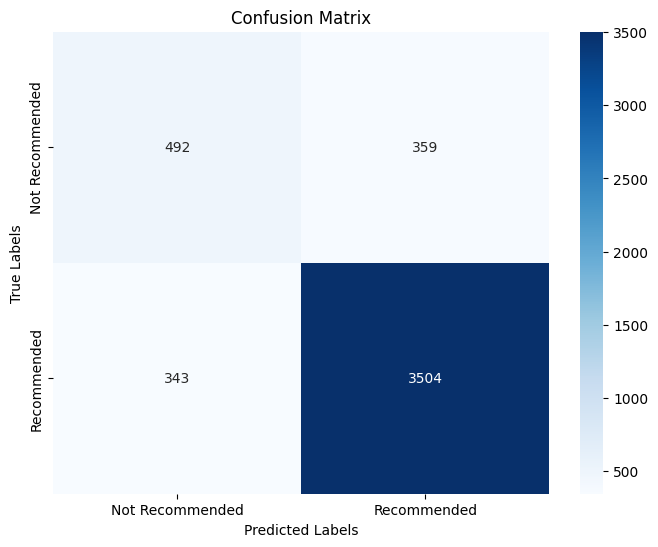

ROC-AUC Score: 0.8790989484076135


0.8790989484076135

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.

labels = ['Not Recommended', 'Recommended']

evaluate_classifier(rf_model, Aug_test, y_test_aug, labels=labels)

### XG Boost

#### Hyperparameter Tuning for XGBoost Classifier

##### Overview
Hyperparameter tuning was performed on the XGBOost classifier to leverage the full potential of XGBoost.

##### XGBoost Model Setup

###### Initial Configuration
Before starting the hyperparameter tuning, the XGBoost model is initialized with base settings that are conducive to the data and the computational resources available:
- **Use of Label Encoder**: **Disabled** to handle label encoding manually.
- **Evaluation Metric**: `logloss` to minimize the probability error.
- **Tree Method**: Set to `hist` for a histogram-based approach, enhancing speed and scalability.
- **Device**: Utilizing `cuda` for GPU computation to speed up the training process.
- **Random State**: Ensured for reproducibility of results.

###### Parameter Grid for Tuning
A comprehensive parameter grid is defined to explore a wide range of configurations:
- `n_estimators`: The number of gradient boosted trees. More trees can lead to better performance but might cause overfitting.
- `learning_rate`: Also known as the "shrinkage" rate, this influences how quickly the model learns, potentially affecting both performance and overfitting.
- `max_depth`: Controls the depth of each tree, which impacts the model's ability to generalize.
- `subsample`: The fraction of samples to be used for each tree, a lower ratio can prevent overfitting but too low might lead to underfitting.
- `colsample_bytree`: The fraction of features to be used for each tree, influencing how each tree can perform feature selection.
- `tree_method`: Ensured to be `gpu_hist` for all configurations, leveraging GPU capabilities to enhance performance.

##### Tuning Process

###### Execution of Grid Search
- **Parallel Backend**: Utilizing `loky` for managing parallel task execution.
- **Grid Search**: Conducted using `tune_classifier`, which internally applies `GridSearchCV` to systematically evaluate and compare all parameter combinations.
- **Goal**:  Identify the optimal combination of parameters that yields the best performance based on the training data, particularly considering the balanced dataset via SMOTE

######  Evaluation of Tuned Model
- **Model Selection:** The best performing model from the grid search is selected based on its accuracy score during cross-validation.
- **Output Parameters:** The best parameters are reported, providing transparency into what configurations lead to the most effective model.

##### Conclusion
The hyperparameter tuning of the XGBoost classifier is a crucial step in optimizing its performance, particularly for challenging datasets with class imbalances. By carefully selecting and testing a range of hyperparameter settings, we ensure that the model is not only accurate but also efficient and robust against overfitting.


In [ ]:

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',  # Use histogram-based method
    device='cuda',       # Use CUDA for GPU computation
    random_state=42
)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'tree_method': ['gpu_hist']  # GPU method
}

with parallel_backend('loky'):
    best_model_xgb = tune_classifier(xgb_model, param_grid_xgb, X_train_smote, y_train_smote, random_state=42)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:22:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0, 'tree_method': 'gpu_hist'}
Best score: 0.9055747502232787


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:22:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.70      0.59      0.64       851
    Recommended       0.91      0.94      0.93      3847

       accuracy                           0.88      4698
      macro avg       0.80      0.77      0.78      4698
   weighted avg       0.87      0.88      0.87      4698



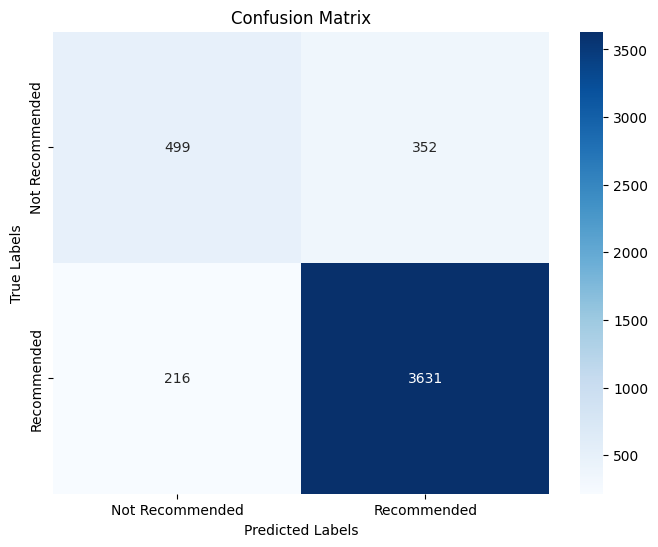

ROC-AUC Score: 0.9058478580070786


0.9058478580070786

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']

evaluate_classifier(best_model_xgb, X_test, y_test, labels=labels)

####  Advanced Tuning and Pruning of XGBoost Classifier

#####  Overview
Following the successful initial hyperparameter tuning of the XGBoost model, the next step involves pruning and adjusting other critical parameters to refine the model’s performance further. Pruning helps prevent overfitting by controlling the complexity of the model trees, enhancing the model's ability to generalize to unseen data.

##### Setup for Pruning and Further Tuning

###### Initial Model Configuration
Based on the optimal parameters identified from the first round of tuning:
- **Colsample_bytree**: Set to 1.0, using all features for tree building.
- **Learning Rate**: Starts with 0.2, as identified previously.
- **Max Depth**: Maintained at 7 to control tree depth.
- **N Estimators**: 300, ensuring a robust number of trees.
- **Subsample**: Set to 1.0, using all samples for building trees.


###### New Parameter Grid for Pruning
To enhance model simplification and prevent overfitting, a new set of parameters is introduced:
- **Max Leaves**: Controls the maximum number of terminal nodes in the trees (`max_leaves`), with options to explore including no limit (0) and various fixed numbers.
- **Min Child Weight**: Increases the minimum sum of instance weight needed in a child to control overfitting more finely.
- **Learning Rate**: Further tuning with finer adjustments to explore the impact of slower learning on model performance.

##### Execution of Second Grid Search

###### Parameter Grid
The new parameter grid is defined to test the effects of:
- `max_leaves`: [0, 10, 20, 30]
- `min_child_weight`: [1, 2, 4]
- `learning_rate`: [0.01, 0.05, 0.1]

###### Tuning Process
- **Tool**: Use the `tune_classifier` function equipped with `GridSearchCV`.
- **Objective**: Identify settings that optimize the trade-off between model complexity and predictive accuracy, especially important for ensuring generalization beyond the training data.

##### Evaluation and Selection

###### Best Model Selection
After conducting the grid search with the updated parameter grid, the configuration yielding the highest cross-validation score is chosen:
- **Best Parameters**: Include settings for `max_leaves`, `min_child_weight`, and a potentially adjusted `learning_rate`.
- **Performance Metric**: Best score, indicating the effectiveness of the model under the new parameters.




In [ ]:
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='gpu_hist',  # Use the histogram-based method as the tree method
    device='cuda',       # Explicitly use CUDA for GPU computation
    colsample_bytree=1.0,
    learning_rate=0.2,   # Starting with the best learning rate from the first search
    max_depth=7,
    n_estimators=300,
    subsample=1.0,
    random_state=42
)

param_grid_xgb1 = {
    'max_leaves': [0, 10, 20, 30],  # 0 for no limit
    'min_child_weight': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

best_model_xgb2 = tune_classifier(xgb_model, param_grid_xgb1, X_train_smote, y_train_smote, random_state=42)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:46:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Best parameters: {'learning_rate': 0.1, 'max_leaves': 0, 'min_child_weight': 1}
Best score: 0.9027622449813031


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:46:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.68      0.58      0.63       851
    Recommended       0.91      0.94      0.92      3847

       accuracy                           0.87      4698
      macro avg       0.80      0.76      0.78      4698
   weighted avg       0.87      0.87      0.87      4698



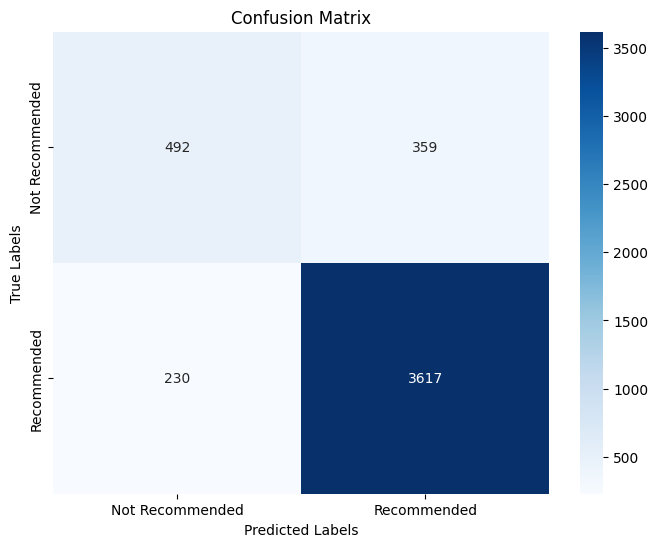

ROC-AUC Score: 0.905163026296377


0.905163026296377

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']

evaluate_classifier(best_model_xgb2, X_test, y_test, labels=labels)

#### Data Augmentation

##### Overview
Continuing the refinement of our machine learning models, we apply data augmentation techniques to the XGBoost classifier.

##### Process of Data Augmentation for XGBoost

###### Model Training on Augmented Data
The XGBoost model is first trained using the augmented data obtained from synonym replacement, which adds linguistic variations to the dataset:
- **Configuration**:
  - `use_label_encoder`: Disabled to handle label encoding manually.
  - `eval_metric`: Set to 'logloss' to optimize the logarithmic loss.
  - `tree_method`: 'hist', utilizing a histogram-based method for faster computation.
  - `device`: CUDA enabled for leveraging GPU computation to enhance speed.
- **Training Data**: The model is trained on the augmented dataset (`Aug_train`) paired with the original labels (`y_train_aug`).

###### Evaluation of the Model
The performance of the XGBoost model trained on augmented data is assessed:
- **Testing Set**: The model is evaluated against the augmented test set (`Aug_test`).
- **Labels**: Categories are defined as ['Not Recommended', 'Recommended'] for clarity in results.
- **Metrics**: Evaluation includes the generation of a classification report and a confusion matrix to visualize the model's effectiveness in correctly predicting classes.

###### Balancing Augmented Data with SMOTE
To address data imbalances:
- **SMOTE Application**: The augmented training data is further balanced using SMOTE to ensure equal representation of classes.
- **Re-training**: The model is then re-trained on this SMOTE-enhanced dataset (`Aug_train_smote`, `y_train_aug_smote`).

###### Re-evaluation of the SMOTE-Enhanced Model
- **Performance Analysis**: After training on the balanced augmented dataset, the model is evaluated again to compare the impact of SMOTE on its performance.
- **Metrics and Visualization**: Similar to the first evaluation, the model's accuracy and the precision of class predictions are thoroughly analyzed.

##### Conclusion
Applying data augmentation followed by SMOTE balancing provides a comprehensive approach to enhancing the robustness and accuracy of the XGBoost classifier.

##### Unbalanced

In [ ]:
# Train an XGBoost classifier on the augmented training data with specific settings for enhanced performance and efficiency.
xgb_model = train_classifier(
    Aug_train,          # Augmented training data to provide diverse linguistic features
    y_train_aug,        # Corresponding labels for the augmented data
    classifier=XGBClassifier,
    use_label_encoder=False,     # Disable the default label encoder to handle categorical variables natively
    eval_metric='logloss',       # Optimize the model based on the logarithmic loss, suitable for binary classification
    tree_method='hist',          # Utilize the histogram-based method for faster computation and scalability
    device='cuda'                # Enable GPU computation using CUDA to speed up the training process
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.73      0.50      0.59       851
    Recommended       0.90      0.96      0.93      3847

       accuracy                           0.88      4698
      macro avg       0.81      0.73      0.76      4698
   weighted avg       0.87      0.88      0.87      4698



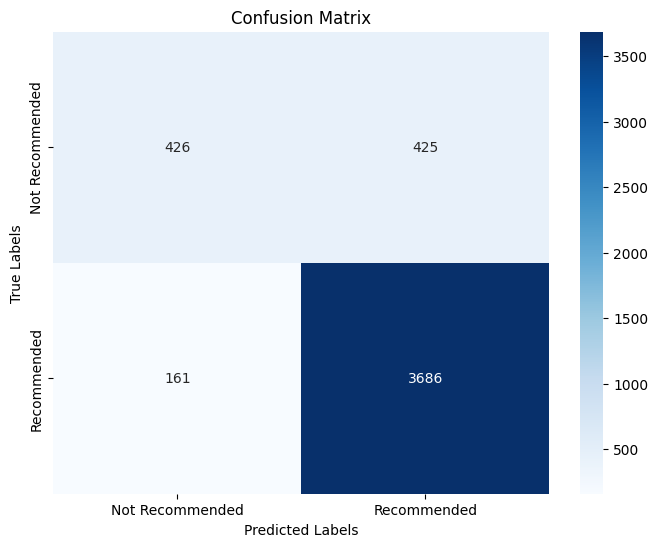

ROC-AUC Score: 0.9051425607635415


0.9051425607635415

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']

evaluate_classifier(xgb_model, Aug_test,  y_test_aug, labels=labels)

##### Smothened Data

In [ ]:
# Train an XGBoost classifier on SMOTE-balanced augmented training data for improved accuracy on minority classes.
xgb_model = train_classifier(
    Aug_train_smote,  # SMOTE-balanced augmented training data to ensure fair representation of all classes
    y_train_aug_smote,  # Corresponding labels for the augmented and balanced data
    classifier=XGBClassifier,
    use_label_encoder=False,     # Disable the default label encoder to handle categorical variables natively
    eval_metric='logloss',       # Optimize the model based on the logarithmic loss, suitable for binary classification
    tree_method='hist',          # Utilize the histogram-based method for faster computation and scalability
    device='cuda'                # Enable GPU computation using CUDA to speed up the training process
)

Classification Report for the Model:
                 precision    recall  f1-score   support

Not Recommended       0.68      0.58      0.63       851
    Recommended       0.91      0.94      0.92      3847

       accuracy                           0.87      4698
      macro avg       0.79      0.76      0.78      4698
   weighted avg       0.87      0.87      0.87      4698



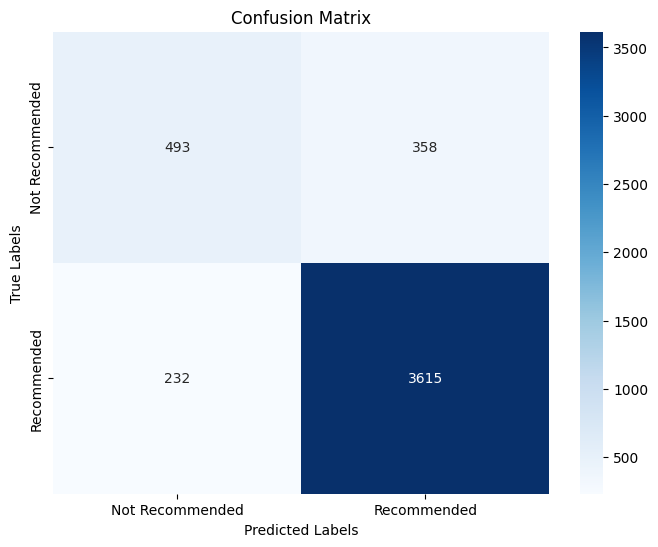

ROC-AUC Score: 0.8996858998893335


0.8996858998893335

In [ ]:
# Evaluate the Random Forest model's performance on the test set using predefined labels for clarity in the results.
labels = ['Not Recommended', 'Recommended']

evaluate_classifier(xgb_model, Aug_test,  y_test_aug, labels=labels)

## Deep Learning Models (LSTM)

### Data Preparation

#### Overview
To leverage the capabilities of LSTM for text classification, we need to prepare our text data appropriately. This involves tokenizing the text, padding sequences to a uniform length, and integrating additional features (sentiment scores).

#### Data Preparation Steps for LSTM

##### 1. Tokenization
- **Tokenizer Initialization**: A tokenizer is set up with a specified vocabulary size (e.g., 5000 words) to manage the complexity and memory usage.
- **Fitting the Tokenizer**: The tokenizer learns the word indices from the `processed_text` data in the dataframe.
- **Converting Texts to Sequences**: Each piece of text is converted into a sequence of integers where each integer represents a specific word in the dictionary created by the tokenizer.

##### 2. Sequence Padding
- **Determining Max Length**: Calculate the maximum sequence length from the dataset to standardize the length of the input sequences.
- **Padding Sequences**: Apply padding to ensure that all sequences have the same length, which is essential for training RNNs. Padding is typically added at the end ('post') of the sequences.

##### 3. Integrating Sentiment Scores
- **Reshaping Sentiment Scores**: Convert the sentiment scores into a format that can be concatenated with the padded sequences, ensuring the sentiment scores have the same number of rows as `X_pad`.
- **Concatenation**: Append the sentiment scores to the end of each sequence, creating an enhanced feature set that combines textual data with derived sentiment metrics.

##### 4. Splitting the Data
- **Train-Test Split**: Divide the dataset into training and testing sets using `train_test_split`
- **Random State**: A fixed random state ensures that the splits are reproducible.

##### 5. Preparing Labels for Neural Network Training
- **Categorical Conversion**: Convert the labels (`y_train_re` and `y_test_re`) into a one-hot encoded format using `to_categorical`. This is crucial for classification tasks where the output layer of the network expects probabilities for each class.

#### Conclusion
 This preparation ensures that the model can efficiently process the data and focus on learning the underlying patterns in the text related to the recommendations and by carefully preparing the data, we set a strong foundation for training robust deep learning models that are capable of handling the complexities and nuances of natural language.



#### Tokenization

In [ ]:
# Initialize a tokenizer to convert text to sequences, using a limited vocabulary size for efficiency.
tokenizer = Tokenizer(num_words=5000)  # Set maximum number of words to keep, based on word frequency.
tokenizer.fit_on_texts(df['processed_text'])  # Fit the tokenizer on the processed text.

#### Sequence Padding

In [ ]:
# Convert texts to sequences of integers, where each integer represents a unique token in the vocabulary.
sequences = tokenizer.texts_to_sequences(df['processed_text'])

# Determine the maximum length to use for padding
max_length = max([len(seq) for seq in sequences])

# Pad all sequences to the maximum length to ensure consistent input size for modeling.
X_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

#### Integrating Sentiment Scores

In [ ]:
# Reshape sentiment scores to have the same number of rows as X_pad
sentiment_scores = np.array(df['sentiment_score']).reshape(-1, 1)

# Combine the padded text sequences with sentiment scores to form the final feature set.
X_pad_with_sentiment = np.hstack((X_pad, sentiment_scores))

#### Splitting the Data

In [ ]:
# Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
X_train_pad_re, X_test_pad_re, y_train_re, y_test_re = train_test_split(X_pad_with_sentiment, df['Recommended IND'], test_size=0.2, random_state=42)


#### Preparing Labels

In [ ]:
# Convert labels to one-hot encoded format to suit the output layer.
y_train_cat_re = to_categorical(y_train_re, num_classes=2)
y_test_cat_re = to_categorical(y_test_re, num_classes=2)

### Deep Learning Model Management

#### Overview
To facilitate the development and evaluation of the deep learning models, specifically recurrent neural networks (RNNs) using LSTM layers, I've have established a suite of functions. These functions assist in building, evaluating, and visualizing the performance of the models throughout the training process.

#### Function Descriptions

##### 1. Model Evaluation Function
- **Purpose**: Evaluates the performance of a trained Keras model using a variety of metrics, including ROC AUC score and accuracy
- **Key Parameters**:
  - `model`: The trained Keras model.
  - `X_test`: Test features.
  - `y_test`: True labels for the test set.
  - `num_classes`: Number of classes in the model's output layer.
- **Outputs**: Prints the accuracy and ROC AUC score

##### 2. LSTM Model Building Function
- **Purpose**: Constructs and compiles an LSTM model tailored to the specifics of the dataset and desired model complexity.
- **Key Parameters**:
  - `input_dim`: Size of the vocabulary.
  - `output_dim`: Dimension of the dense embedding.
  - `lstm_units`: Number of units in the LSTM layer.
  - `dropout_rate`: Fraction of the input units to drop for regularization.
  - `dense_units`: Number of units in the dense layer post-LSTM.
  - `num_classes`: Number of output classes.
  - `learning_rate`: Learning rate for the optimizer.
- **Outputs**: Returns a compiled Keras model ready for training.

##### 3. Training History Visualization Function
- **Purpose**: Provides a visual representation of the training and validation metrics across epochs, aiding in the assessment of model convergence and overfitting.
- **Key Parameters**:
  - `history`: History object returned from the model's fit function.
  - `plot_metrics`: Metrics to plot, typically including 'accuracy' and 'loss'.
- **Outputs**: Plots graphs for specified metrics, showing both training and validation trends, which are crucial for tuning the training process and model parameters.

#### Conclusion
These functions are integral to the streamlined development and evaluation of the deep models in the project. By standardizing model construction, evaluation, and performance visualization, we ensure consistency and reproducibility in the modeling efforts.

In [ ]:
def evaluate_model(model, X_test, y_test, num_classes):
    """
    Evaluates a trained Keras model on a given test dataset using ROC AUC and accuracy metrics.

    This function performs model evaluation by predicting probabilities on the test set and converting these probabilities to class labels.
    It then calculates the ROC AUC score, which measures the model's ability to distinguish between classes, and the accuracy of the model.

    Args:
        model (model): The trained Keras model to evaluate.
        X_test (array-like): Test dataset features.
        y_test (array-like): Actual labels for the test dataset.
        num_classes (int): The number of classes in the output layer of the model, necessary for ROC AUC calculation.

    Outputs:
        Prints the ROC AUC Score and the Accuracy of the model on the test dataset.
    """
    # Predict class probabilities for the given test set
    predictions_prob = model.predict(X_test)
    predictions_classes = np.argmax(predictions_prob, axis=1)

    # Convert y_test to a 1D array if it's presented in one-hot encoded format
    if len(y_test.shape) > 1:
        y_test = np.argmax(y_test, axis=1)

    # Calculate the ROC AUC score using one-hot encoded true labels
    y_test_one_hot = to_categorical(y_test, num_classes=num_classes)
    roc_auc = roc_auc_score(y_test_one_hot, predictions_prob, multi_class='ovo')

    # Calculate accuracy using the predicted class labels and actual labels
    accuracy = np.mean(predictions_classes == y_test)

    print(f"ROC AUC Score: {roc_auc:.2f}")
    print(f"Accuracy: {accuracy:.2f}")


In [ ]:
def build_lstm_model(input_dim=5000, output_dim=64, lstm_units=64, dropout_rate=0.2, dense_units=64, num_classes=5, learning_rate=0.001, dense_activation='relu', loss_function='categorical_crossentropy'):
    """
    Constructs and compiles an LSTM-based neural network model using TensorFlow/Keras for sequence classification tasks.

    Args:
        input_dim (int): The size of the vocabulary used in the Embedding layer.
        output_dim (int): The dimensionality of the embedding vectors.
        lstm_units (int): The number of LSTM units in the LSTM layer.
        dropout_rate (float): The fraction of the neurons to drop out during training to prevent overfitting.
        dense_units (int): The number of neurons in the dense fully connected layer.
        num_classes (int): The number of classes to predict, corresponds to the number of neurons in the output layer.
        learning_rate (float): The step size at each iteration while moving toward a minimum of a loss function.
        dense_activation (str): Activation function to use in the final dense layer, usually 'softmax' for multi-class classification.
        loss_function (str): Loss function to minimize during optimization, typically 'categorical_crossentropy' for multi-class problems.

    Returns:
        model (keras.Model): The fully compiled LSTM model ready for training.

    Example Usage:
        model = build_lstm_model(input_dim=10000, output_dim=128, lstm_units=128, dropout_rate=0.25, dense_units=128, num_classes=10)
    """
    # Initialize the sequential model
    model = Sequential()

    # Add an embedding layer to transform indices into dense vectors of a fixed size
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim))

    # Add an LSTM layer with dropout for regularization
    model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))

    # Add a densely-connected neural network layer with ReLU activation
    model.add(Dense(dense_units, activation='relu'))

    # Include dropout for regularization to prevent overfitting
    model.add(Dropout(dropout_rate))

    # Add the output layer with activation suitable for classification
    model.add(Dense(num_classes, activation=dense_activation))

    # Compile the model with the Adam optimizer and categorical crossentropy as the loss function
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy', AUC()])

    # Return the compiled model ready for training
    return model


In [ ]:
def plot_history(history, plot_metrics=['accuracy', 'loss']):
    """
    Visualizes the training and validation progress of a Keras model across epochs for specified metrics.

    This function generates line plots for each specified metric, comparing the training and validation results.
    This visual representation helps in understanding the model's learning trend and identifying issues like overfitting or underfitting.

    Args:
        history: A Keras History object that records training metrics at each epoch.
        plot_metrics (list of str): Metrics to be plotted. Defaults to ['accuracy', 'loss'] if not specified.

    Displays:
        Line plots for each metric in plot_metrics showing both training and validation changes across epochs.

    """
    # Iterate over each metric provided in plot_metrics
    for metric in plot_metrics:
        metric_values = history.history.get(metric)  # Extract metric values for training data
        val_metric_values = history.history.get(f'val_{metric}')  # Extract metric values for validation data

        # Check if the metric is available in the training history
        if metric_values and val_metric_values:
            plt.figure(figsize=(8, 5))  # Set the figure size for better visibility
            plt.plot(metric_values, label=f'Train {metric.capitalize()}')  # Plot training metric
            plt.plot(val_metric_values, label=f'Validation {metric.capitalize()}')  # Plot validation metric
            plt.title(f'Model {metric.capitalize()}')  # Set the title of the plot
            plt.ylabel(metric.capitalize())  # Label the y-axis with the metric name
            plt.xlabel('Epochs')  # Label the x-axis with 'Epochs'
            plt.legend()  # Add a legend to distinguish training vs. validation
            plt.grid(True)  # Enable grid for easier reading of the plot
            plt.show()  # Display the plot
        else:
            # If the metric is not found, print an error message with available metrics
            print(f"Metric '{metric}' not found in history. Available metrics are: {list(history.history.keys())}")


### Baseline LSTM Training and Evaluation

In [ ]:
# Build an LSTM model for binary classification using specified parameters.
model = build_lstm_model(
    input_dim=5000,     # Defines the size of the vocabulary used in the embedding input layer.
    output_dim=64,      # Dimensionality of the output space for the embedding layer.
    lstm_units=64,      # Number of LSTM units (neurons) in the LSTM layer.
    dropout_rate=0.2,   # Proportion of input units to drop at each update during training to prevent overfitting.
    dense_units=64,     # Number of neurons in the fully connected Dense layer following the LSTM layer.
    num_classes=2,      # Number of classes in the output layer; use 2 for binary classification.
    learning_rate=0.001,  # Step size used by the optimizer during model training.
    dense_activation='sigmoid',  # Activation function for the output layer, 'sigmoid' for binary classification.
    loss_function='binary_crossentropy'  # Loss function to minimize, suitable for binary classification.
)

# Fit the LSTM model to the training data.
history = model.fit(
    X_train_pad_re,     # Padded and reshaped training data features
    y_train_cat_re,     # One-hot encoded training labels
    epochs=10,          # Number of epochs to train the model
    batch_size=32,      # Number of samples per gradient update
    validation_data=(X_test_pad_re, y_test_cat_re)  # Validation data to evaluate the loss and any model metrics at the end of each epoch
)

Epoch 1/10
588/588 [==============================] - 14s 22ms/step - loss: 0.4758 - accuracy: 0.8227 - auc_6: 0.8242 - val_loss: 0.4733 - val_accuracy: 0.8189 - val_auc_6: 0.8190
Epoch 2/10
588/588 [==============================] - 13s 22ms/step - loss: 0.4591 - accuracy: 0.8290 - auc_6: 0.8349 - val_loss: 0.4463 - val_accuracy: 0.8348 - val_auc_6: 0.8451
Epoch 3/10
588/588 [==============================] - 13s 22ms/step - loss: 0.4299 - accuracy: 0.8233 - auc_6: 0.8768 - val_loss: 0.4379 - val_accuracy: 0.8189 - val_auc_6: 0.8593
Epoch 4/10
588/588 [==============================] - 13s 22ms/step - loss: 0.4119 - accuracy: 0.8232 - auc_6: 0.8911 - val_loss: 0.4246 - val_accuracy: 0.8189 - val_auc_6: 0.8784
Epoch 5/10
588/588 [==============================] - 13s 22ms/step - loss: 0.4454 - accuracy: 0.8269 - auc_6: 0.8555 - val_loss: 0.4687 - val_accuracy: 0.8199 - val_auc_6: 0.8274
Epoch 6/10
588/588 [==============================] - 13s 22ms/step - loss: 0.4554 - accuracy: 0.829

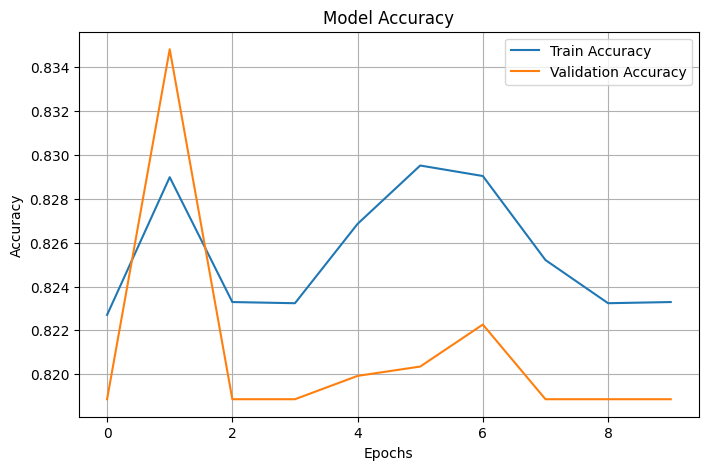

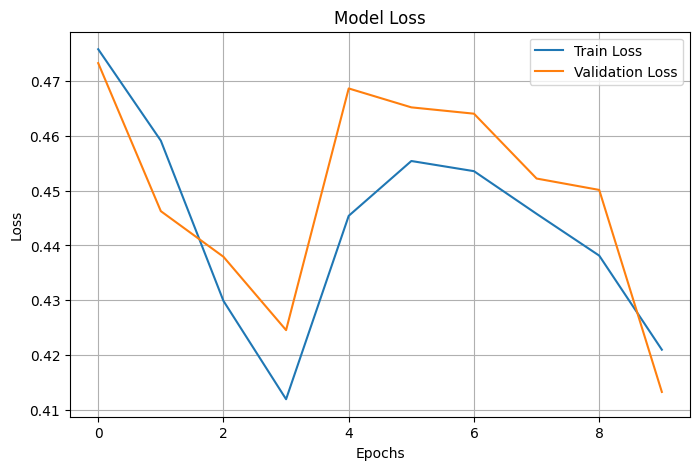

In [ ]:
# Plot the training and validation accuracy and loss for the LSTM model.
plot_history(history, plot_metrics=['accuracy', 'loss'])

In [ ]:
# Evaluate the trained LSTM model on the test dataset to assess its performance.
# The function uses metrics such as ROC AUC score and accuracy to provide a comprehensive evaluation of the model’s ability to classify the data accurately.
evaluate_model(model, X_test_pad_re, y_test_cat_re, num_classes=2)

147/147 [==============================] - 1s 5ms/step
ROC AUC Score: 0.76
Accuracy: 0.82


### Hyper Parameter Tunning

#### Batch Normalization, Multiple LSTM Layers,  (patience=5)

##### Overview
Continuing with the optimization of our LSTM model, we implement additional layers and batch normalization to enhance learning dynamics and model stability.

##### Enhanced LSTM Model Configuration

###### Model Architecture Updates
To increase the model's capacity and control for over-training, several key enhancements are made:

###### 1. **Batch Normalization**
- **Purpose**: Batch normalization is added after embedding and each LSTM layer to normalize the activations. This helps in accelerating the training process and reducing the internal covariate shift by stabilizing the learning environment.
- **Placement**: Positioned right after the embedding layer and each LSTM layer to ensure effective normalization of outputs before the next layer.

###### 2. **Multiple LSTM Layers**
- **Configuration**: Incorporating multiple LSTM layers allows the model to learn at different levels of abstraction:
  - The first LSTM layer returns sequences, feeding the full sequences into the next LSTM layer.
  - The second LSTM layer does not return sequences, preparing for a transition to dense layers.
- **Benefits**: This setup helps in capturing more complex features from the input data, potentially improving the model’s ability to make accurate predictions.

###### 3. **Increased Dropout**
- **Purpose**: Alongside batch normalization, dropout rates are adjusted to prevent overfitting, especially critical given the added model complexity with more LSTM layers.
- **Application**: Dropout is applied after each LSTM and dense layer to randomly ignore a subset of neurons during training, thus helping the model to generalize better.

##### Building the Updated Model
- **Inputs**: Model parameters such as `input_dim`, `output_dim`, and `lstm_units` are specified based on data characteristics and preliminary results.
- **Outputs**: The final output layer uses a 'softmax' activation suitable for multi-class classification, with the number of units corresponding to the number of classes.

In [ ]:
def build_lstm_model(input_dim, output_dim, lstm_units, dropout_rate, dense_units, num_classes, dense_activation='relu', loss_function='categorical_crossentropy', learning_rate=0.001):
    """
    Build an LSTM-based neural network model.

    Args:
        input_dim (int): Size of the vocabulary.
        output_dim (int): Dimension of the dense embedding.
        lstm_units (int): Number of units in each LSTM layer.
        dropout_rate (float): Fraction of the input units to drop.
        dense_units (int): Number of units in the dense layer.
        num_classes (int): Number of classes (output layer).
        dense_activation (str): Activation function for the dense layer.
        loss_function (str): Loss function for training the model.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        A compiled Keras model.
    """
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim))
    model.add(BatchNormalization())  # Batch normalization layer after embedding
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(BatchNormalization())  # Batch normalization layer after first LSTM
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units))  # Second LSTM layer for deeper learning
    model.add(BatchNormalization())  # Batch normalization layer after second LSTM
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation=dense_activation))
    model.add(BatchNormalization())  # Batch normalization layer after Dense
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the EarlyStopping callback to monitor the validation loss and stop training when it stops improving.
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss of the model
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Construct an LSTM model using defined parameters. The model is designed for binary classification with
# a deep learning architecture that includes LSTM layers for sequence processing.
model = build_lstm_model(
   input_dim=5000,     # Defines the size of the vocabulary used in the embedding input layer.
    output_dim=64,      # Dimensionality of the output space for the embedding layer.
    lstm_units=64,      # Number of LSTM units (neurons) in the LSTM layer.
    dropout_rate=0.3,   # Proportion of input units to drop at each update during training to prevent overfitting.
    dense_units=64,     # Number of neurons in the fully connected Dense layer following the LSTM layer.
    num_classes=2,      # Number of classes in the output layer; use 2 for binary classification.
    dense_activation='sigmoid',  # Activation function for the output layer, 'sigmoid' for binary classification.
    loss_function='binary_crossentropy'  # Loss function to minimize, suitable for binary classification.
)

# Train the LSTM model with the specified training and validation data,
# including the EarlyStopping callback to prevent overfitting and unnecessary computation.
history = model.fit(
     X_train_pad_re,     # Padded and reshaped training data features
    y_train_cat_re,     # One-hot encoded training labels
    epochs=10,          # Number of epochs to train the model
    batch_size=32,      # Number of samples per gradient update
    validation_data=(X_test_pad_re, y_test_cat_re)  # Validation data to evaluate the loss and any model metrics at the end of each epoch
    callbacks=[early_stopping]  # List of callbacks to apply during training
)

Epoch 1/10
588/588 [==============================] - 17s 24ms/step - loss: 0.5212 - accuracy: 0.7808 - val_loss: 0.3510 - val_accuracy: 0.8427
Epoch 2/10
588/588 [==============================] - 14s 24ms/step - loss: 0.2986 - accuracy: 0.8768 - val_loss: 0.3064 - val_accuracy: 0.8787
Epoch 3/10
588/588 [==============================] - 14s 24ms/step - loss: 0.2284 - accuracy: 0.9116 - val_loss: 0.3310 - val_accuracy: 0.8876
Epoch 4/10
588/588 [==============================] - 14s 23ms/step - loss: 0.1798 - accuracy: 0.9357 - val_loss: 0.3010 - val_accuracy: 0.8821
Epoch 5/10
588/588 [==============================] - 14s 23ms/step - loss: 0.1433 - accuracy: 0.9491 - val_loss: 0.3657 - val_accuracy: 0.8793
Epoch 6/10
588/588 [==============================] - 14s 24ms/step - loss: 0.1138 - accuracy: 0.9629 - val_loss: 0.4241 - val_accuracy: 0.8710
Epoch 7/10
588/588 [==============================] - 14s 24ms/step - loss: 0.0937 - accuracy: 0.9705 - val_loss: 0.4823 - val_accuracy:

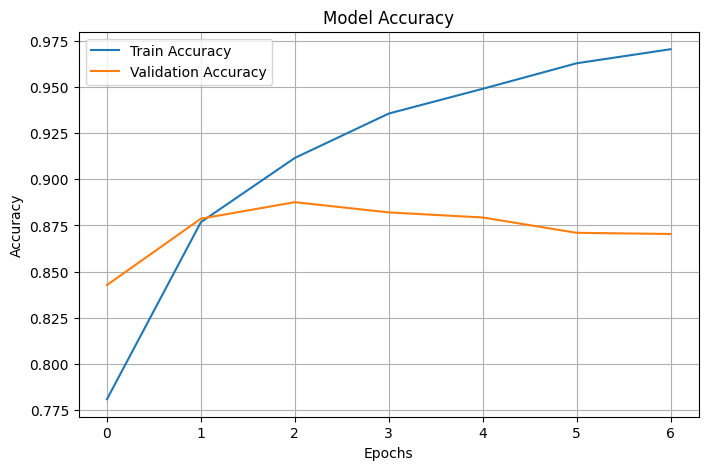

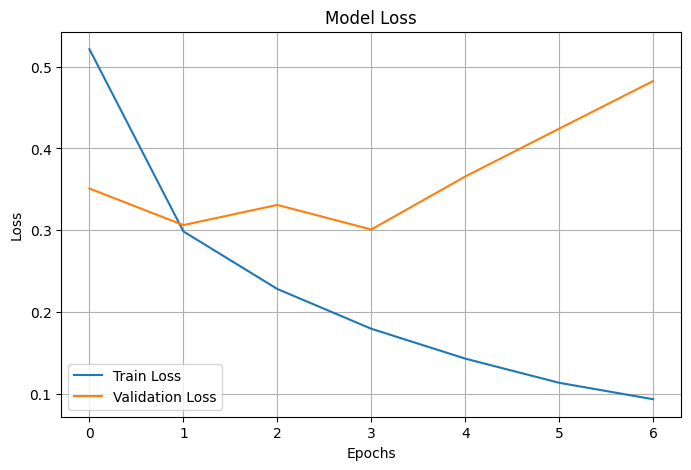

In [ ]:
# Plot the training and validation accuracy and loss for the LSTM model.
plot_history(history, plot_metrics=['accuracy', 'loss'])

In [ ]:
# Evaluate the re-trained LSTM model on the test dataset to assess its performance.
# The function uses metrics such as ROC AUC score and accuracy to provide a comprehensive evaluation of the model’s ability to classify the data accurately.
evaluate_model(model, X_test_pad_re, y_test_cat_re, num_classes=2)

147/147 [==============================] - 1s 7ms/step
ROC AUC Score: 0.91
Accuracy: 0.88


### Regularization

#### Implementing Regularization in LSTM Model

#### Overview
To enhance  generalization of our LSTM model, we incorporate L1 and L2 regularization. These regularization techniques are crucial for reducing overfitting, particularly in complex models trained on large datasets.

#### Regularization Techniques

##### L1 and L2 Regularization
- **Purpose**: Regularization discourages learning overly complex models by penalizing the loss function based on the magnitude of the coefficients. L1 regularization encourages sparsity (leading to feature selection), while L2 regularization discourages the weights from reaching large values.
- **Implementation**:
  - **LSTM Layer**: Both L1 and L2 regularizations are applied to the LSTM layer, affecting both the kernel and the recurrent components. This helps in controlling overfitting during the learning of temporal dependencies.
  - **Dense Layer**: Regularization is also applied to the dense layers, promoting simpler models with smaller weight coefficients, which can lead to better performance on test data.

##### Model Configuration
- **Embedding Layer**: Starts the model with an embedding layer to convert input data into dense vectors of fixed size.
- **LSTM Layer**: Configured with dropout and recurrent dropout, alongside L1 and L2 regularizations to control the complexity and stability of the model.
- **Dense Layers**:
  - A dense layer with ReLU activation function follows the LSTM layer, also incorporating regularization.
  - A final output layer with a softmax activation function, tailored for multi-class classification, includes regularization to ensure consistent predictions across various classes.

##### Model Compilation
- **Optimizer**: The Adam optimizer is selected for its effectiveness in handling sparse gradients and adaptive learning rates.

In [ ]:
def build_lstm_model(input_dim, output_dim, lstm_units, dropout_rate, dense_units, num_classes, l1=0.01, l2=0.01, dense_activation='softmax', loss_function='categorical_crossentropy'):
    """
    Builds and compiles an LSTM model with L1 and L2 regularization to prevent overfitting and improve generalization.

    Args:
        input_dim (int): Size of the vocabulary used in the embedding layer.
        output_dim (int): Dimension of the dense embeddings generated by the embedding layer.
        lstm_units (int): Number of units in the LSTM layer.
        dropout_rate (float): Proportion of the input units to drop at each update during training to prevent overfitting.
        dense_units (int): Number of units in the dense layer.
        num_classes (int): Number of output classes.
        l1 (float): L1 regularization factor applied to the weights.
        l2 (float): L2 regularization factor applied to the weights.
        dense_activation (str): Activation function to use for the output layer.
        loss_function (str): Loss function to use for the learning model.

    Returns:
        model (Sequential): Compiled LSTM model with embedded regularization.

    This model integrates both L1 and L2 regularization in its LSTM and dense layers to penalize the weights during optimization,
    which can help in reducing overfitting and ensuring that the model learns more robust, generalized patterns rather than
    overly fitting to the noise in the training data.
    """
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim))
    model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate,
                   kernel_regularizer=l1_l2(l1=l1, l2=l2),  # Regularization for LSTM weights
                   recurrent_regularizer=l1_l2(l1=l1, l2=l2)))  # Regularization for LSTM recurrent weights
    model.add(Dense(dense_units, activation='relu',
                    kernel_regularizer=l1_l2(l1=l1, l2=l2)))  # Regularization for Dense layer weights
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation=dense_activation,
                    kernel_regularizer=l1_l2(l1=l1, l2=l2)))  # Regularization for output layer weights

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    return model


In [ ]:
# Example usage with regularization
model = build_lstm_model(
    input_dim=5000,     # Size of the vocabulary
    output_dim=64,      # Dimension of the dense embedding
    lstm_units=64,      # Number of LSTM units
    dropout_rate=0.2,   # Dropout rate
    dense_units=64,     # Number of units in the Dense layer
    num_classes=2,      # Number of output classes
    l1=0.0001,          # L1 regularization factor
    l2=0.0001,         # L2 regularization factor
    dense_activation='sigmoid',
    loss_function='binary_crossentropy'
)

# Fitting the model with the Early Stopping callback
history = model.fit(
    X_train_pad_re, y_train_cat_re,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad_re, y_test_cat_re),
    callbacks=[early_stopping]
)

Epoch 1/10
588/588 [==============================] - 13s 20ms/step - loss: 0.5395 - accuracy: 0.8221 - val_loss: 0.4943 - val_accuracy: 0.8189
Epoch 2/10
588/588 [==============================] - 12s 20ms/step - loss: 0.4872 - accuracy: 0.8232 - val_loss: 0.4872 - val_accuracy: 0.8189
Epoch 3/10
588/588 [==============================] - 12s 20ms/step - loss: 0.4808 - accuracy: 0.8232 - val_loss: 0.4824 - val_accuracy: 0.8189
Epoch 4/10
588/588 [==============================] - 12s 20ms/step - loss: 0.4775 - accuracy: 0.8232 - val_loss: 0.4801 - val_accuracy: 0.8189
Epoch 5/10
588/588 [==============================] - 12s 20ms/step - loss: 0.4746 - accuracy: 0.8232 - val_loss: 0.4786 - val_accuracy: 0.8189
Epoch 6/10
588/588 [==============================] - 12s 20ms/step - loss: 0.4731 - accuracy: 0.8232 - val_loss: 0.4802 - val_accuracy: 0.8189
Epoch 7/10
588/588 [==============================] - 12s 20ms/step - loss: 0.4726 - accuracy: 0.8232 - val_loss: 0.4773 - val_accuracy:

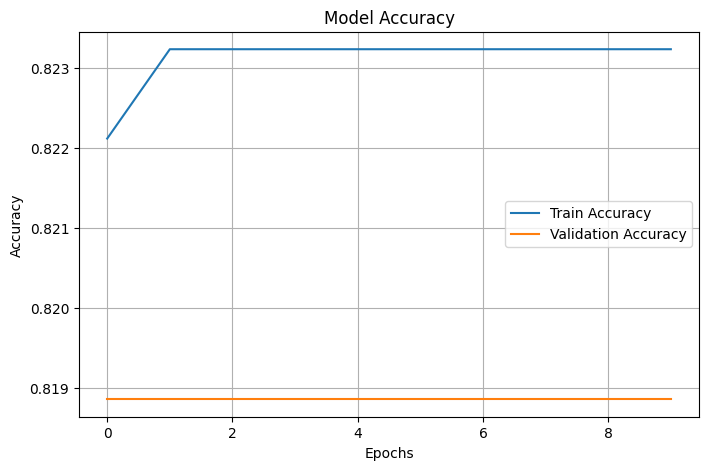

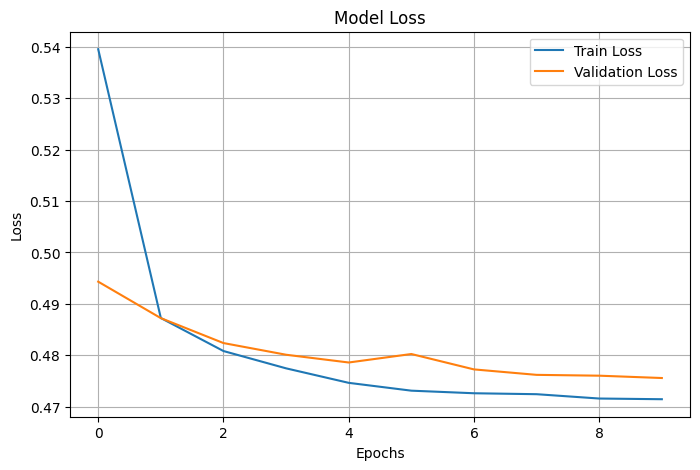

In [ ]:
# Plot the training and validation accuracy and loss for the LSTM model.
plot_history(history, plot_metrics=['accuracy', 'loss'])

In [ ]:
# Evaluate the re-trained LSTM model on the test dataset to assess its performance.
# The function uses metrics such as ROC AUC score and accuracy to provide a comprehensive evaluation of the model’s ability to classify the data accurately.
evaluate_model(model, X_test_pad_re, y_test_cat_re, num_classes=2)

147/147 [==============================] - 1s 3ms/step
ROC AUC Score: 0.40
Accuracy: 0.82


### Replacing LSTM layers with GRU Layers

#### Refining Model Architecture with GRU and Batch Normalization

##### Overview
Following the trials with L1/L2 regularization, which did not yield optimal results, we shifted our focus back to modifying the model architecture. This time, we replaced LSTM layers with GRU (Gated Recurrent Unit) layers and enhanced the model with batch normalization to improve learning dynamics and model stability.

##### Model Enhancements with GRU Layers


##### Model Configuration
- **Embedding Layer**: Continues to transform input data into dense vectors of a specified size.
- **GRU Layers**:
  - First GRU layer with `return_sequences=True` to pass sequential information to another GRU layer, allowing the model to learn from the entire sequence.
  - An optional additional GRU layer increases the model's depth, aimed at capturing more complex patterns in the data.
- **Batch Normalization**:
  - Applied after each GRU layer to normalize the activations and speed up the training.
  - Helps in stabilizing the neural network's learning process by reducing internal covariate shift.

##### Dense Layers and Regularization
- **Dense Layer**: A fully connected layer with ReLU activation follows the GRU layers to introduce non-linearity into the model, enhancing its ability to learn complex patterns.
- **Dropout**: Applied after the dense layer to reduce overfitting by randomly dropping units during the training process.

##### Output Layer and Compilation
- **Optimizer**: Configured with Adam optimizer which adapts learning rates and is efficient in handling sparse gradients.
- **Learning Rate and Loss Function**:
  - An increased learning rate of 0.008 is tested to explore its impact on faster convergence.



In [ ]:
def build_gru_model(input_dim, output_dim, gru_units, dropout_rate, dense_units, num_classes, dense_activation='softmax', loss_fn ='categorical_crossentropy'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim))

    # GRU layer followed by Batch Normalization
    model.add(GRU(gru_units, return_sequences=True))
    model.add(BatchNormalization())  # Add Batch Normalization after GRU layer

    # Additional GRU layer for a deeper model (optional)
    model.add(GRU(gru_units))
    model.add(BatchNormalization())  # Add Batch Normalization after GRU layer

    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer with softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.008)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    return model

In [ ]:
model = build_gru_model(
    input_dim=5000,     # Size of the vocabulary
    output_dim=64,      # Dimension of the dense embedding
    gru_units=64,       # Number of GRU units
    dropout_rate=0.2,   # Dropout rate
    dense_units=64,     # Number of units in the Dense layer
    num_classes=2,      # Number of output classes (e.g., 5 rating classes)
    dense_activation='sigmoid',
    loss_fn='binary_crossentropy'
)

history = model.fit(
    X_train_pad_re, y_train_cat_re,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad_re, y_test_cat_re),
    callbacks=[early_stopping]
)

Epoch 1/10
588/588 [==============================] - 20s 29ms/step - loss: 0.3414 - accuracy: 0.8554 - val_loss: 0.6888 - val_accuracy: 0.8189
Epoch 2/10
588/588 [==============================] - 17s 28ms/step - loss: 0.2588 - accuracy: 0.8938 - val_loss: 0.5529 - val_accuracy: 0.8795
Epoch 3/10
588/588 [==============================] - 17s 29ms/step - loss: 0.2344 - accuracy: 0.9066 - val_loss: 0.3077 - val_accuracy: 0.8753
Epoch 4/10
588/588 [==============================] - 17s 29ms/step - loss: 0.2253 - accuracy: 0.9112 - val_loss: 0.3442 - val_accuracy: 0.8763
Epoch 5/10
588/588 [==============================] - 17s 29ms/step - loss: 0.2343 - accuracy: 0.9050 - val_loss: 0.4316 - val_accuracy: 0.8714
Epoch 6/10
588/588 [==============================] - 17s 29ms/step - loss: 0.2419 - accuracy: 0.9034 - val_loss: 0.4269 - val_accuracy: 0.8589


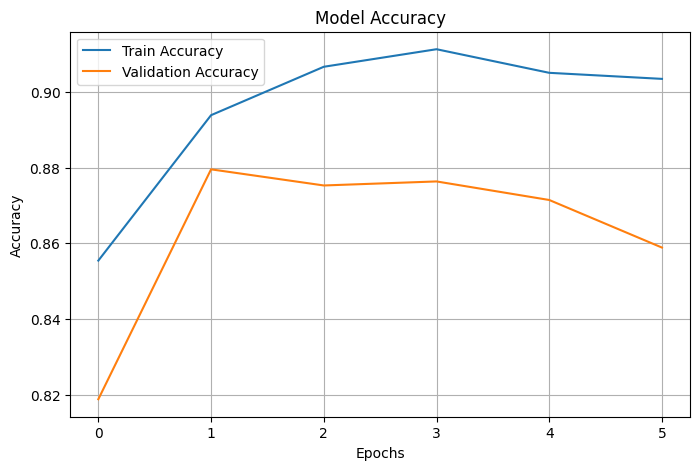

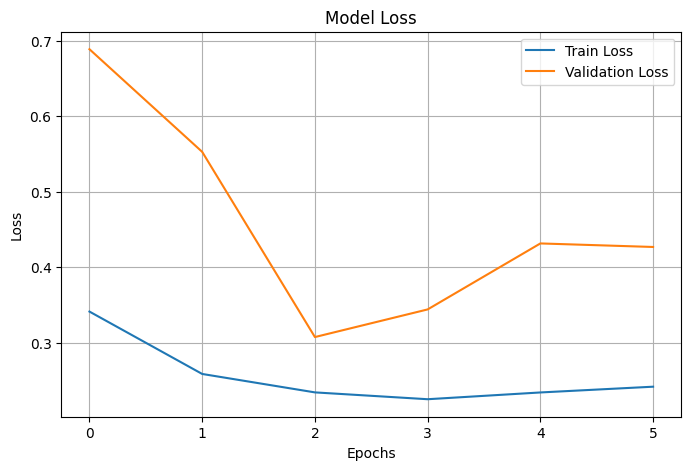

In [ ]:
# Plot the training and validation accuracy and loss for the LSTM model.
plot_history(history, plot_metrics=['accuracy', 'loss'])

In [ ]:
# Evaluate the re-trained LSTM model on the test dataset to assess its performance.
# The function uses metrics such as ROC AUC score and accuracy to provide a comprehensive evaluation of the model’s ability to classify the data accurately.
evaluate_model(model, X_test_pad_re, y_test_cat_re, num_classes=2)

147/147 [==============================] - 1s 6ms/step
ROC AUC Score: 0.89
Accuracy: 0.88


## Deep Learning Models (BERT)


### Data Preparation

### Overview
To leverage the powerful capabilities of the BERT (Bidirectional Encoder Representations from Transformers) model for our text classification task, we first need to properly prepare our dataset. This involves tokenizing the text data to fit the input requirements of BERT, handling attention masks, and integrating additional features such as sentiment score






#### Tokenization with BERT
- **Tokenizer Initialization**: We utilize the `AutoTokenizer` from the `transformers` library, selecting 'bert-base-uncased' as our pre-trained model. This tokenizer converts text into tokens that are understandable by the BERT model.
- **Tokenization Function**:
  - The function processes text by converting it into a list format, applying truncation and padding to ensure uniform length, and setting a maximum sequence length.
  - The tokenizer returns `input_ids` and `attention_masks`, which are crucial for BERT to understand which parts of the text are meaningful and should be focused on.

In [ ]:
# Initialize the BERT tokenizer to convert text into tokens that can be fed to a BERT model.
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
def tokenize_texts(texts):
    """
    Tokenizes text sequences using a pre-trained BERT tokenizer.

    Args:
        texts (list of str): The list of text strings to tokenize.

    Returns:
        A dictionary containing tokenized outputs with padding, truncation, and attention mask.
    """
    # Tokenize the text with BERT tokenizer settings suitable for input into a BERT model.
    return tokenizer(texts.tolist(), truncation=True, padding=True, max_length=512, return_tensors="tf")

# Tokenize the dataset and retrieve input ids and attention masks.
encodings = tokenize_texts(df['processed_text'])
input_ids = encodings['input_ids']
attention_masks = encodings['attention_mask']

#### Sentiment Scores and Labels
- **Sentiment Scores**: We reshape the sentiment scores to align with the tokenized text data, ensuring each input sequence includes a corresponding sentiment score.
- **Label Preparation**: The recommendation labels are one-hot encoded to fit the output format expected by the neural network, facilitating straightforward classification.


In [ ]:
# Reshape sentiment scores to align with other tensor shapes and prepare labels for model training.
sentiment_scores = df['sentiment_score'].values.reshape(-1, 1)
labels = tf.keras.utils.to_categorical(df['Recommended IND'].values, num_classes=2)

In [ ]:
# Split the data into training and testing sets using sklearn's train_test_split.
train_data, test_data, train_labels, test_labels = train_test_split(
    list(zip(input_ids.numpy(), attention_masks.numpy(), sentiment_scores)),  # Combine inputs and sentiment scores into tuples.
    labels,
    test_size=0.2,
    random_state=42
)

#### Data Packaging for Model Input
- **Unpacking Data**: Extract input ids, attention masks, and sentiment scores from the tokenized outputs to prepare them for model training.
- **Dataset Creation Function**:
  - Combines the prepared features into a TensorFlow dataset, which is optimized for performance and scalability.
  - Shuffles and batches the data, making it ready for training.

In [ ]:
# Unpack and create datasets
train_inputs, train_masks, train_scores = zip(*train_data)
test_inputs, test_masks, test_scores = zip(*test_data)

In [ ]:
def create_dataset(input_ids, attention_masks, labels, sentiment_scores, batch_size=8):
    """
    Creates a TensorFlow dataset for the model.

    Args:
        input_ids (tf.Tensor): Tensor of input ids derived from the BERT tokenizer.
        attention_masks (tf.Tensor): Tensor of attention masks indicating to the model which tokens should be attended to.
        labels (tf.Tensor): Tensor of one-hot encoded labels.
        sentiment_scores (tf.Tensor): Tensor of sentiment scores.

    Returns:
        A tf.data.Dataset object ready for model training or evaluation.
    """
    # Construct a TensorFlow dataset from the tensors.
    dataset = tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': input_ids,
            'attention_mask': attention_masks,
            'sentiment_scores': sentiment_scores
        },
        labels
    ))
    # Shuffle and batch the dataset.
    return dataset.shuffle(len(labels)).batch(batch_size)

#### Creating Training and Testing Datasets
- **Dataset Construction**:
  - The training and testing datasets are created by specifying the tensors for input ids, attention masks, sentiment scores, and labels.
  - This structured approach ensures that the model receives the data in a format that maximizes learning efficiency.

In [ ]:
# Convert Python lists to TensorFlow constants. This step is crucial for ensuring that data can be handled efficiently by TensorFlow operations.
train_dataset = create_dataset(
    train_inputs_tf,  # Training inputs including token IDs and attention masks.
    train_masks_tf,   # Attention masks for the training inputs.
    train_labels_tf,  # Target labels for the training set.
    train_scores_tf   # Sentiment scores as additional features.
)

test_dataset = create_dataset(
    test_inputs_tf,   # Testing inputs including token IDs and attention masks.
    test_masks_tf,    # Attention masks for the testing inputs.
    test_labels_tf,   # Target labels for the testing set.
    test_scores_tf    # Sentiment scores as additional features.
)

In [ ]:
pip install tensorflow==2.8.0 transformers==4.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 99.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 67.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninsta

### Creating and Managing BERT Model with Sentiment Features

#### Overview
The custom model that integrates sentiment scores with BERT's output. This approach enhances the model's understanding of the text by combining learned embeddings with quantitative sentiment analysis.

#### Model Architecture

##### Incorporating BERT Layer
- **Pretrained BERT Model**: We utilize `TFBertModel` from the Hugging Face `transformers` library, specifically the 'bert-base-uncased' model, which provides a strong foundation of pre-trained language understanding.
- **BERT Outputs**: The model is set up to use BERT's pooled output, which is a fixed-size representation of the input tokens and serves as a concise summary of the text.

##### Inputs to the Model
- **Input Layers**:
  - `input_ids`: Token identifiers for the BERT model.
  - `attention_mask`: Mask to avoid processing of padding tokens in BERT.
  - `sentiment_scores`: Additional input layer to incorporate sentiment scores directly into the model's decision-making process.

##### Integrating Sentiment Scores
- **Concatenation**: The pooled output from BERT is concatenated with the sentiment scores. This enriched feature set combines deep contextualized text embeddings with sentiment-driven data, aiming to improve the relevance and accuracy of predictions.

##### Output Layer and Compilation
- **Dense and Dropout Layers**: After combining features, the data is passed through a dense layer with ReLU activation followed by a dropout layer to prevent overfitting.
- **Final Output**: A softmax activation function in the final dense layer ensures that the output is a probability distribution over the two classes.

##### Model Compilation
- **Creating the Model**: A Keras functional model is defined with the specified input and output layers. This structure is flexible, supporting complex inputs and outputs which is ideal for integrating features like sentiment scores.
- **Optimization and Loss**: The model is typically compiled with an optimizer  and a loss function.

In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

def create_bert_sentiment_model(model_name='bert-base-uncased', num_labels=2):
    """
    This function builds a TensorFlow model that integrates BERT embeddings with additional sentiment features,
    suitable for classification tasks with two classes (e.g., positive and negative sentiment).

    Args:
        model_name (str): Identifier for the BERT model to load from the Hugging Face model hub.
        num_labels (int): Number of output labels in the classification task

    Returns:
        tf.keras.Model: A TensorFlow model that combines BERT embeddings and additional sentiment score inputs
                        for sentiment classification.
    """
    # Load the BERT model as a layer in a larger model architecture.
    bert_layer = TFBertModel.from_pretrained(model_name)

    # Define the input layers for the BERT model and additional sentiment scores.
    input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="attention_mask")
    sentiment_scores = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="sentiment_scores")

    # Get the pooled output of the BERT layer, which represents a fixed-length encoding of the input sequence.
    bert_output = bert_layer(input_ids, attention_mask=attention_mask)[1]  # [1] accesses the pooled_output of BERT.

    # Concatenate the BERT pooled output with the sentiment scores for a richer feature set.
    concatenated_features = tf.keras.layers.Concatenate()([bert_output, sentiment_scores])

    # Add a dense layer to interpret the concatenated features, followed by dropout for regularization.
    dense_output = tf.keras.layers.Dense(64, activation='relu')(concatenated_features)
    dropout = tf.keras.layers.Dropout(0.1)(dense_output)

    # Final output layer uses softmax activation suitable for binary classification, as defined by `num_labels`.
    final_output = tf.keras.layers.Dense(num_labels, activation='softmax')(dropout)

    # Create the complete model specifying inputs and output.
    model = tf.keras.Model(inputs=[input_ids, attention_mask, sentiment_scores], outputs=final_output)

    return model

# Example of initializing the model.
model = create_bert_sentiment_model()


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


### Baseline BERT Model

In [ ]:
# Initialize the BERT-based sentiment analysis model.
model = create_bert_sentiment_model()

# Compile the model with specific configurations for training.
# Accuracy and ROC AUC are included as metrics for performance evaluation.
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Optimizer with a specified learning rate for fine-tuning.
    loss='binary_crossentropy',  # Loss function for binary classification.
    metrics=['accuracy', AUC(name='roc_auc')]  # Metrics to monitor training performance.
)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Train the model
history = model.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3
2349/2349 [==============================] - 2660s 1s/step - loss: 0.4472 - accuracy: 0.8297 - roc_auc: 0.8594 - val_loss: 0.4768 - val_accuracy: 0.8189 - val_roc_auc: 0.8324
Epoch 2/3
2349/2349 [==============================] - 2647s 1s/step - loss: 0.4718 - accuracy: 0.8232 - roc_auc: 0.8251 - val_loss: 0.4711 - val_accuracy: 0.8189 - val_roc_auc: 0.8582
Epoch 3/3
2349/2349 [==============================] - 2651s 1s/step - loss: 0.4682 - accuracy: 0.8231 - roc_auc: 0.8325 - val_loss: 0.4739 - val_accuracy: 0.8189 - val_roc_auc: 0.8550


In [ ]:
# Evaluate the model
results = model.evaluate(test_dataset)
print(f"Accuracy: {results[1]}, ROC AUC: {results[2]}")

588/588 [==============================] - 177s 301ms/step - loss: 0.4739 - accuracy: 0.8189 - roc_auc: 0.8550
Accuracy: 0.8188591003417969, ROC AUC: 0.854982852935791


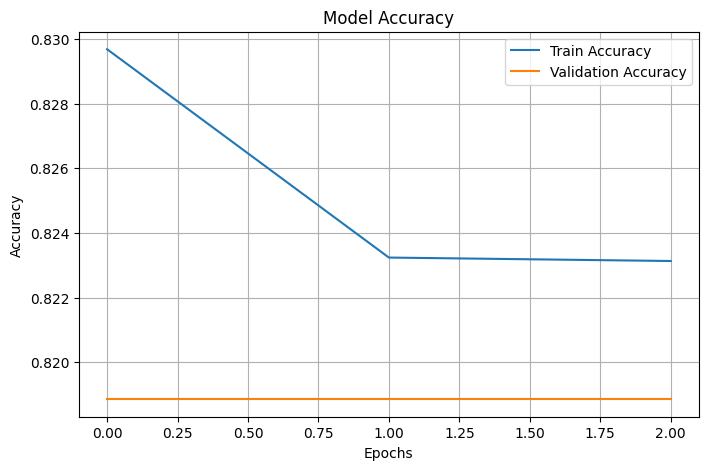

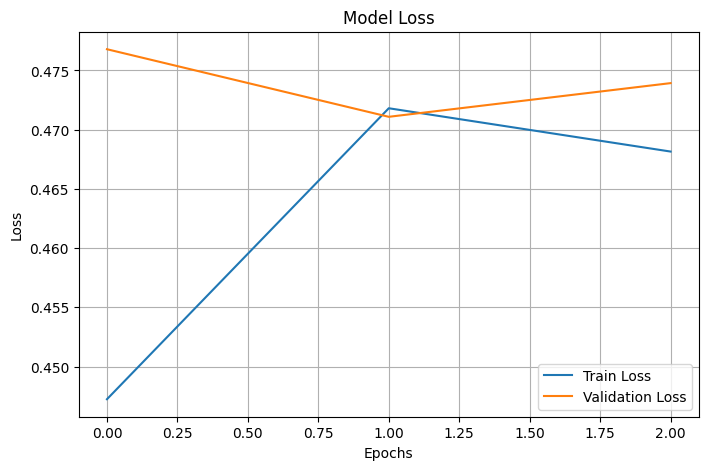

In [ ]:
# Plot training and validation metrics
plot_history(history, ['accuracy', 'loss'])

### Hyper Parameter Tuning for the BERT Model

#### Overview
To refine our BERT model's performance, we focus on tuning essential hyperparameters: the number of training epochs, implementing early stopping, and adjusting the learning rate.

#### Tuning Strategies

##### 1. Increasing the Number of Epochs
- **Objective**: Extend the number of epochs to provide the model more opportunities to learn from the data.
- **Approach**: Gradually increase epochs while monitoring performance to avoid overfitting.

##### 2. Implementing Early Stopping
- **Purpose**: Halt training when validation metrics cease improving, thus preventing overfitting.
- **Configuration**:
  - **Monitor**: Typically the validation loss.
  - **Patience**: The number of epochs to continue training without improvement 
  - **Restore Best Weights**: Optionally restore the best model weights from the point of highest validation accuracy.

##### 3. Adjusting Learning Rate
- **Rationale**: Optimize the rate at which the model learns, ensuring it is neither too slow (leading to long training times) nor too fast (causing convergence issues).
- **Method**: Employ learning rate schedules or adaptive learning rate techniques like ReduceLROnPlateau:
  - **ReduceLROnPlateau**: Reduce the learning rate when a metric has stopped improving. Parameters include `factor` (`factor=0.1`), `patience`, and `min_lr` (the lower bound on the learning rate).he lower bound on the learning rate).

#### increasing the number of epochs

In [ ]:
# Initialize the BERT-based sentiment analysis model.
model = create_bert_sentiment_model()

# Compile the model with specific configurations for training.
# Accuracy and ROC AUC are included as metrics for performance evaluation.
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Optimizer with a specified learning rate for fine-tuning.
    loss='binary_crossentropy',  # Loss function for binary classification.
    metrics=['accuracy', AUC(name='roc_auc')]  # Metrics to monitor training performance.
)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Train the model
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
2349/2349 [==============================] - 2687s 1s/step - loss: 0.3320 - accuracy: 0.8561 - roc_auc: 0.9308 - val_loss: 0.2981 - val_accuracy: 0.8806 - val_roc_auc: 0.9477
Epoch 2/5
2349/2349 [==============================] - 2722s 1s/step - loss: 0.3459 - accuracy: 0.8650 - roc_auc: 0.9236 - val_loss: 0.4713 - val_accuracy: 0.8189 - val_roc_auc: 0.8461
Epoch 3/5
2349/2349 [==============================] - 2723s 1s/step - loss: 0.4705 - accuracy: 0.8232 - roc_auc: 0.8261 - val_loss: 0.4730 - val_accuracy: 0.8189 - val_roc_auc: 0.8577
Epoch 4/5
2349/2349 [==============================] - 2720s 1s/step - loss: 0.4696 - accuracy: 0.8232 - roc_auc: 0.8285 - val_loss: 0.4730 - val_accuracy: 0.8189 - val_roc_auc: 0.8724
Epoch 5/5
2349/2349 [==============================] - 2721s 1s/step - loss: 0.4669 - accuracy: 0.8232 - roc_auc: 0.8335 - val_loss: 0.4743 - val_accuracy: 0.8189 - val_roc_auc: 0.8437


In [ ]:
# Evaluate the model
results = model.evaluate(test_dataset)
print(f"Accuracy: {results[1]}, ROC AUC: {results[2]}")

588/588 [==============================] - 177s 301ms/step - loss: 0.4743 - accuracy: 0.8189 - roc_auc: 0.8437
Accuracy: 0.8188591003417969, ROC AUC: 0.843742847442627


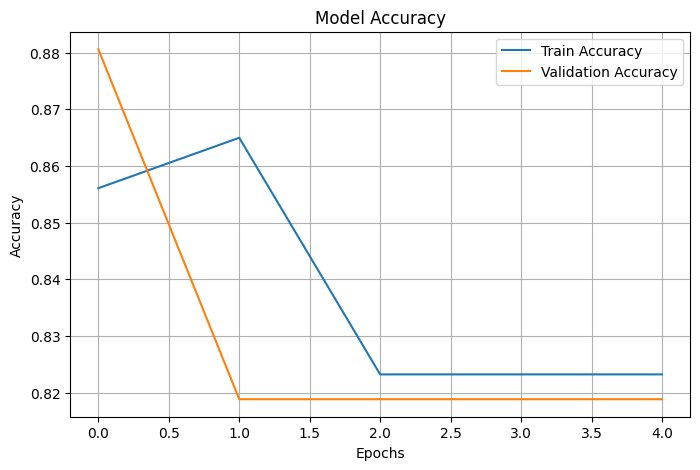

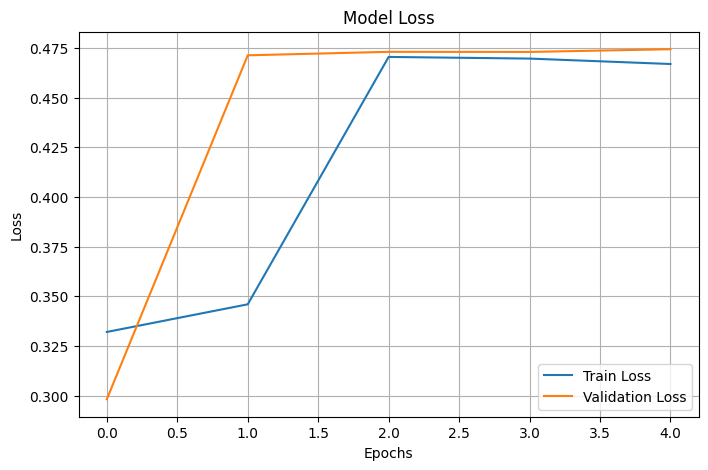

In [ ]:
# Plot training and validation metrics
plot_history(history, ['accuracy', 'loss'])

#### Implementing Early Stop, adjusting learning rate

In [ ]:
# Initialize the BERT-based sentiment analysis model.
model = create_bert_sentiment_model()

# Compile the model with specific configurations for training.
# Accuracy and ROC AUC are included as metrics for performance evaluation.
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Optimizer with a specified learning rate for fine-tuning.
    loss='binary_crossentropy',  # Loss function for binary classification.
    metrics=['accuracy', AUC(name='roc_auc')]  # Metrics to monitor training performance.
)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Create an EarlyStopping callback instance
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=3,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Create a ReduceLROnPlateau callback instance
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,   # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=2,   # Number of epochs with no improvement after which learning rate will be reduced.
    min_lr=1e-6   # Lower bound on the learning rate.
)


history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
    callbacks=[early_stopping, reduce_lr]  # Passing multiple callbacks
)

Epoch 1/5
2349/2349 [==============================] - 2750s 1s/step - loss: 0.4730 - accuracy: 0.8233 - roc_auc: 0.8242 - val_loss: 0.4740 - val_accuracy: 0.8189 - val_roc_auc: 0.8436 - lr: 5.0000e-05
Epoch 2/5
2349/2349 [==============================] - 2708s 1s/step - loss: 0.4693 - accuracy: 0.8232 - roc_auc: 0.8295 - val_loss: 0.4712 - val_accuracy: 0.8189 - val_roc_auc: 0.8568 - lr: 5.0000e-05
Epoch 3/5
2349/2349 [==============================] - 2669s 1s/step - loss: 0.4678 - accuracy: 0.8231 - roc_auc: 0.8326 - val_loss: 0.4682 - val_accuracy: 0.8189 - val_roc_auc: 0.8756 - lr: 5.0000e-05
Epoch 4/5
2349/2349 [==============================] - 2662s 1s/step - loss: 0.4659 - accuracy: 0.8232 - roc_auc: 0.8364 - val_loss: 0.4780 - val_accuracy: 0.8189 - val_roc_auc: 0.8788 - lr: 5.0000e-05
Epoch 5/5
2349/2349 [==============================] - 2659s 1s/step - loss: 0.4626 - accuracy: 0.8232 - roc_auc: 0.8431 - val_loss: 0.4775 - val_accuracy: 0.8189 - val_roc_auc: 0.8687 - lr: 5

In [ ]:
# Evaluate the model
results = model.evaluate(test_dataset)
print(f"Accuracy: {results[1]}, ROC AUC: {results[2]}")

588/588 [==============================] - 173s 295ms/step - loss: 0.4775 - accuracy: 0.8189 - roc_auc: 0.8687
Accuracy: 0.8188591003417969, ROC AUC: 0.8686990141868591


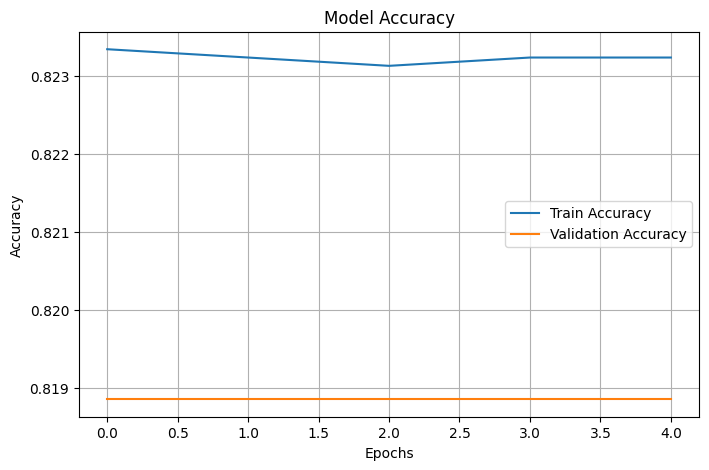

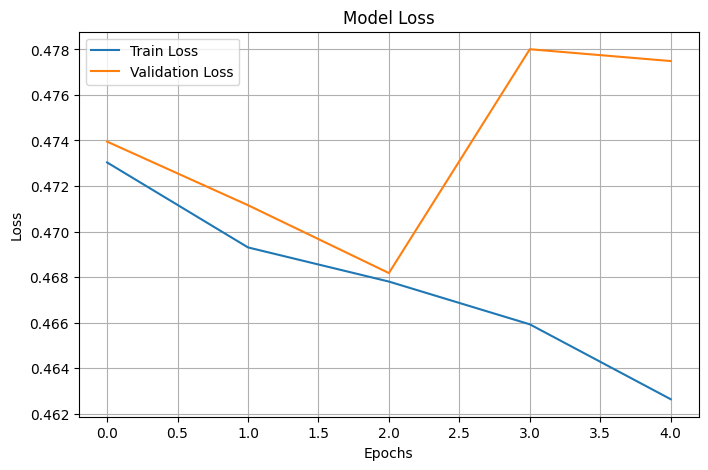

In [ ]:
# Plot training and validation metrics
plot_history(history, ['accuracy', 'loss'])

##### Regularization (L2 regularizer 0.01 and Dropout 0.3)

In [ ]:
def create_bert_sentiment_model(model_name='bert-base-uncased', num_labels=2, dropout_rate=0.3, l2_rate=0.01):
    # Load the pre-trained BERT model
    bert_layer = TFBertModel.from_pretrained(model_name)

    # Define input layers
    input_ids = Input(shape=(None,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(None,), dtype=tf.int32, name="attention_mask")
    sentiment_scores = Input(shape=(1,), dtype=tf.float32, name="sentiment_scores")

    # BERT outputs
    bert_output = bert_layer(input_ids, attention_mask=attention_mask)[1]  # Get the pooled output

    # Concatenate BERT output with sentiment scores
    concatenated_features = Concatenate()([bert_output, sentiment_scores])

    # Dense layer with L2 regularization
    dense_output = Dense(64, activation='relu', kernel_regularizer=l2(l2_rate))(concatenated_features)

    # Dropout layer
    dropout = Dropout(dropout_rate)(dense_output)

    # Final output layer
    final_output = Dense(num_labels, activation='softmax')(dropout)

    # Construct the model
    model = Model(inputs=[input_ids, attention_mask, sentiment_scores], outputs=final_output)

    return model


In [ ]:
# Model compilation
model = create_bert_sentiment_model()
model.compile(optimizer=Adam(learning_rate=5e-5), loss='binary_crossentropy', metrics=['accuracy', AUC(name='roc_auc')])

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Create an EarlyStopping callback instance
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=3,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Create a ReduceLROnPlateau callback instance
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,   # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=2,   # Number of epochs with no improvement after which learning rate will be reduced.
    min_lr=1e-6   # Lower bound on the learning rate.
)


history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
    callbacks=[early_stopping, reduce_lr]  # You can pass multiple callbacks
)

Epoch 1/5
2349/2349 [==============================] - 2680s 1s/step - loss: 0.9610 - accuracy: 0.8399 - roc_auc: 0.9093 - val_loss: 0.7321 - val_accuracy: 0.6667 - val_roc_auc: 0.8147 - lr: 5.0000e-05
Epoch 2/5
2349/2349 [==============================] - 2657s 1s/step - loss: 0.6674 - accuracy: 0.8230 - roc_auc: 0.8273 - val_loss: 0.5799 - val_accuracy: 0.8189 - val_roc_auc: 0.8189 - lr: 5.0000e-05
Epoch 3/5
2349/2349 [==============================] - 2661s 1s/step - loss: 0.5455 - accuracy: 0.8232 - roc_auc: 0.8247 - val_loss: 0.5068 - val_accuracy: 0.8189 - val_roc_auc: 0.8601 - lr: 5.0000e-05
Epoch 4/5
2349/2349 [==============================] - 2662s 1s/step - loss: 0.5054 - accuracy: 0.8232 - roc_auc: 0.8268 - val_loss: 0.4913 - val_accuracy: 0.8189 - val_roc_auc: 0.8531 - lr: 5.0000e-05
Epoch 5/5
2349/2349 [==============================] - 2661s 1s/step - loss: 0.4945 - accuracy: 0.8232 - roc_auc: 0.8268 - val_loss: 0.4864 - val_accuracy: 0.8189 - val_roc_auc: 0.8545 - lr: 5

In [ ]:
# Evaluate the model
results = model.evaluate(test_dataset)
print(f"Accuracy: {results[1]}, ROC AUC: {results[2]}")

588/588 [==============================] - 174s 297ms/step - loss: 0.4864 - accuracy: 0.8189 - roc_auc: 0.8545
Accuracy: 0.8188591003417969, ROC AUC: 0.8544599413871765


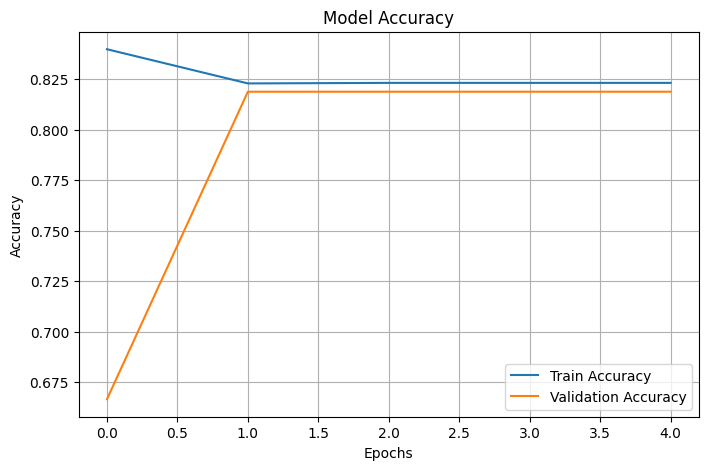

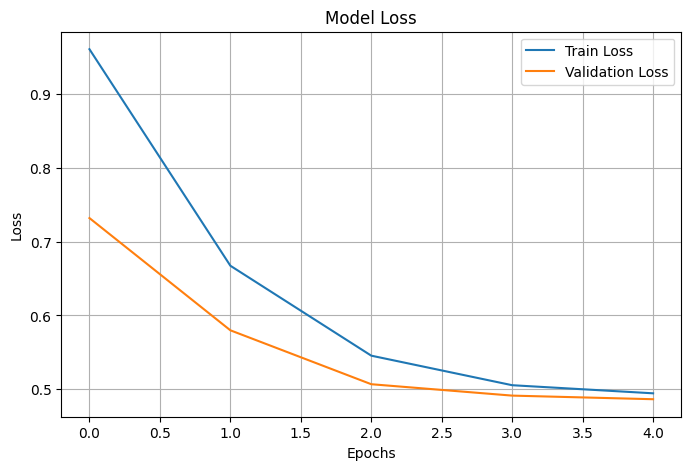

In [ ]:
# Plot training and validation metrics
plot_history(history, ['accuracy', 'loss'])

### Tuning Reguarizers (L2 and Dropout)

#### Regularization and Tuning in BERT Model Training

##### Overview
To enhance the generalization capability of our BERT-based sentiment classification model, we implement regularization techniques, specifically L2 regularization and dropout. These methods help manage model complexity and prevent overfitting, which is crucial for maintaining robust performance across diverse datasets.

##### Implementing Regularization Strategies

###### Purpose of Regularization
- **L2 Regularization**: Adds a penalty on the magnitude of model weights, encouraging smaller weight values, which can lead to a simpler and more generalizable model.
- **Dropout**: Randomly drops units (along with their connections) during training, which helps prevent neurons from co-adapting too much and forces the model to learn robust features independently.

###### Tuning Regularization Parameters
The effectiveness of regularization often depends on the specific values used for parameters like the L2 rate and dropout rate. We explore different settings to find the optimal configuration:

- **L2 Rates**: Testing values such as 0.01, 0.03, and 0.05 to determine the impact of increasing the penalty strength on model weights.
- **Dropout Rates**: Experimenting with rates like 0.3, 0.4, and 0.5 to assess how varying levels of neuron exclusion affect model training and performance.

###### Training with Regularization
For each combination of L2 and dropout rates, we perform the following steps:
- **Model Setup**: Create a new BERT model instance for each parameter set using the function `create_bert_sentiment_model`, applying the specified L2 and dropout rates.
- **Compilation**: The model is compiled with an optimizer (Adam), a low learning rate (5e-5), and the binary_crossentropy loss function, which is appropriate for binary classification tasks.

###### Evaluation and Results
- **Training and Validation**: Each model configuration is trained and validated over a set number of epochs ( 5 epochs), monitoring performance metrics such as accuracy and ROC AUC.
- **Performance Metrics**:
  - **Accuracy**: Measures the proportion of correctly predicted instances to total instances.
  - **ROC AUC**: Assesses the model's ability to distinguish between classes across different threshold settings.

The Model was terminated at L2 rate: 0.03 and Dropout rate: 0.4 as there was no significant improvement in the model

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training model with L2 rate: 0.01 and Dropout rate: 0.3
Epoch 1/5
2349/2349 [==============================] - 2690s 1s/step - loss: 1.0194 - accuracy: 0.8242 - roc_auc: 0.8763 - val_loss: 0.7438 - val_accuracy: 0.8189 - val_roc_auc: 0.8189
Epoch 2/5
2349/2349 [==============================] - 2672s 1s/step - loss: 0.6398 - accuracy: 0.8232 - roc_auc: 0.8230 - val_loss: 0.5732 - val_accuracy: 0.8189 - val_roc_auc: 0.8416
Epoch 3/5
2349/2349 [==============================] - 2706s 1s/step - loss: 0.5569 - accuracy: 0.8232 - roc_auc: 0.8230 - val_loss: 0.5350 - val_accuracy: 0.8189 - val_roc_auc: 0.8559
Epoch 4/5
2349/2349 [==============================] - 2750s 1s/step - loss: 0.5308 - accuracy: 0.8232 - roc_auc: 0.8306 - val_loss: 0.5235 - val_accuracy: 0.8189 - val_roc_auc: 0.8396
Epoch 5/5
588/588 [==============================] - 181s 309ms/step - loss: 0.5086 - accuracy: 0.8189 - roc_auc: 0.8619
Accuracy: 0.8188591003417969, ROC AUC: 0.8619248867034912


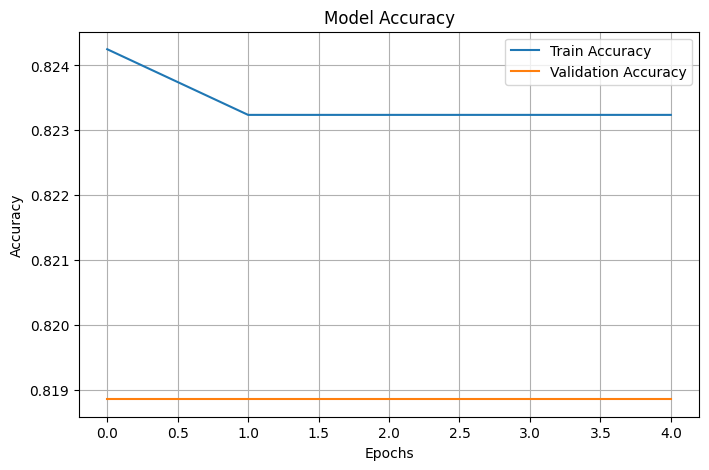

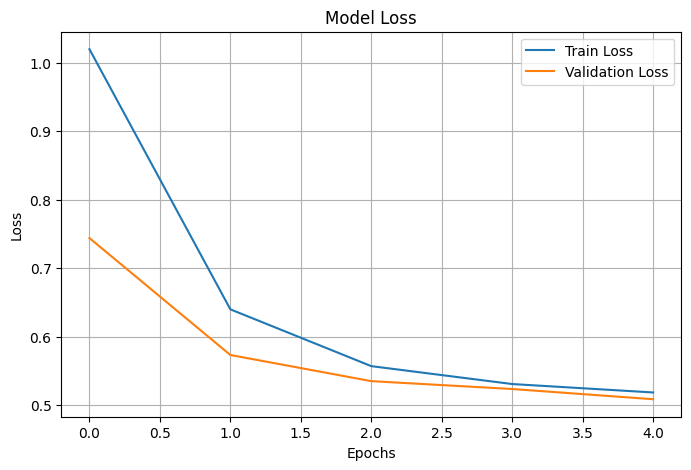

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training model with L2 rate: 0.01 and Dropout rate: 0.4
Epoch 1/5
2349/2349 [==============================] - 2715s 1s/step - loss: 1.1655 - accuracy: 0.8228 - roc_auc: 0.8328 - val_loss: 0.8029 - val_accuracy: 0.8189 - val_roc_auc: 0.8233
Epoch 2/5
2349/2349 [==============================] - 2693s 1s/step - loss: 0.6817 - accuracy: 0.8232 - roc_auc: 0.8248 - val_loss: 0.5991 - val_accuracy: 0.8189 - val_roc_auc: 0.8522
Epoch 3/5
2349/2349 [==============================] - 2696s 1s/step - loss: 0.5621 - accuracy: 0.8232 - roc_auc: 0.8290 - val_loss: 0.5274 - val_accuracy: 0.8189 - val_roc_auc: 0.8415
Epoch 4/5
2349/2349 [==============================] - 2692s 1s/step - loss: 0.5184 - accuracy: 0.8232 - roc_auc: 0.8253 - val_loss: 0.5031 - val_accuracy: 0.8189 - val_roc_auc: 0.8769
Epoch 5/5
588/588 [==============================] - 178s 303ms/step - loss: 0.4904 - accuracy: 0.8189 - roc_auc: 0.8644
Accuracy: 0.8188591003417969, ROC AUC: 0.8644235134124756


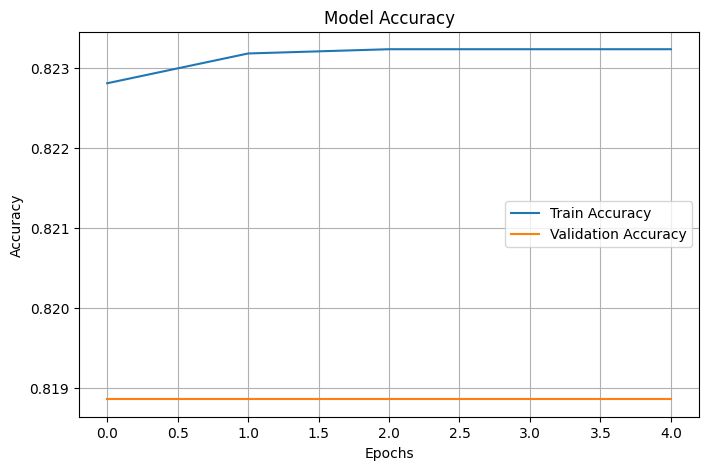

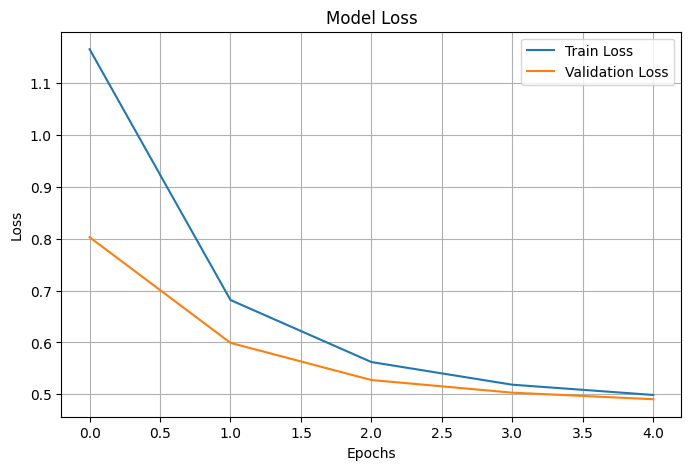

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training model with L2 rate: 0.01 and Dropout rate: 0.5
Epoch 1/5
2349/2349 [==============================] - 2701s 1s/step - loss: 1.0135 - accuracy: 0.8377 - roc_auc: 0.8951 - val_loss: 0.7164 - val_accuracy: 0.8189 - val_roc_auc: 0.8755
Epoch 2/5
2349/2349 [==============================] - 2726s 1s/step - loss: 0.6351 - accuracy: 0.8370 - roc_auc: 0.8478 - val_loss: 0.5759 - val_accuracy: 0.8189 - val_roc_auc: 0.8645
Epoch 3/5
2349/2349 [==============================] - 2713s 1s/step - loss: 0.5530 - accuracy: 0.8232 - roc_auc: 0.8234 - val_loss: 0.5172 - val_accuracy: 0.8189 - val_roc_auc: 0.8449
Epoch 4/5
2349/2349 [==============================] - 2698s 1s/step - loss: 0.5166 - accuracy: 0.8232 - roc_auc: 0.8278 - val_loss: 0.4999 - val_accuracy: 0.8189 - val_roc_auc: 0.8583
Epoch 5/5
588/588 [==============================] - 177s 300ms/step - loss: 0.4931 - accuracy: 0.8189 - roc_auc: 0.8366
Accuracy: 0.8188591003417969, ROC AUC: 0.8365774154663086


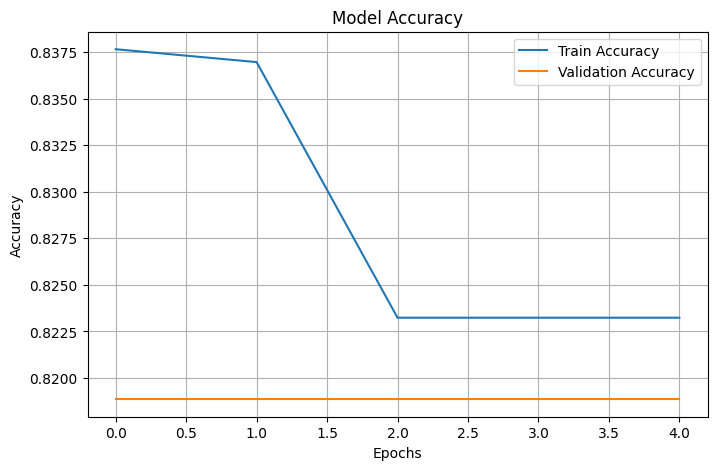

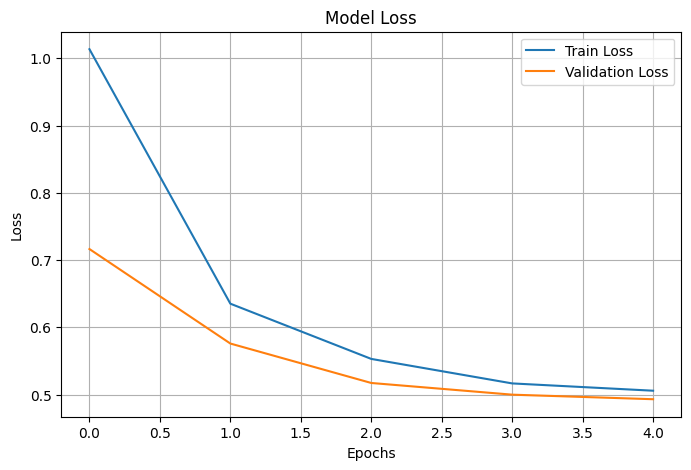

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training model with L2 rate: 0.03 and Dropout rate: 0.3
Epoch 1/5
2349/2349 [==============================] - 2715s 1s/step - loss: 1.5094 - accuracy: 0.8646 - roc_auc: 0.9342 - val_loss: 0.5388 - val_accuracy: 0.8897 - val_roc_auc: 0.9469
Epoch 2/5
2349/2349 [==============================] - 2699s 1s/step - loss: 0.3916 - accuracy: 0.8937 - roc_auc: 0.9536 - val_loss: 0.4079 - val_accuracy: 0.8780 - val_roc_auc: 0.9002
Epoch 3/5
2349/2349 [==============================] - 2694s 1s/step - loss: 0.5008 - accuracy: 0.8234 - roc_auc: 0.8386 - val_loss: 0.4943 - val_accuracy: 0.8189 - val_roc_auc: 0.8453
Epoch 4/5
2349/2349 [==============================] - 2704s 1s/step - loss: 0.4902 - accuracy: 0.8232 - roc_auc: 0.8265 - val_loss: 0.4853 - val_accuracy: 0.8189 - val_roc_auc: 0.8458
Epoch 5/5
588/588 [==============================] - 177s 302ms/step - loss: 0.4791 - accuracy: 0.8189 - roc_auc: 0.8457
Accuracy: 0.8188591003417969, ROC AUC: 0.8457254767417908


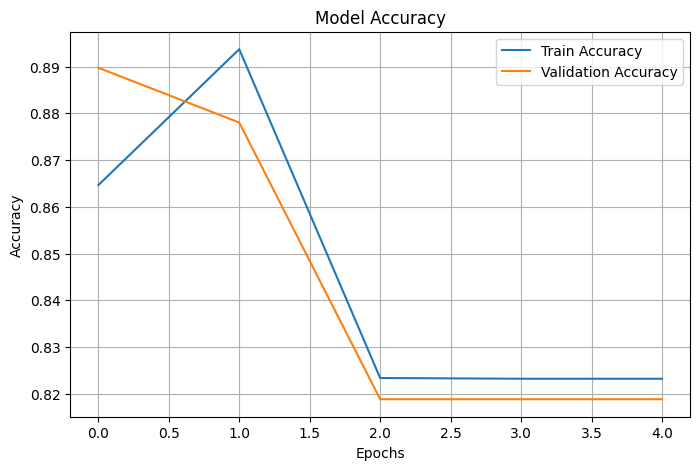

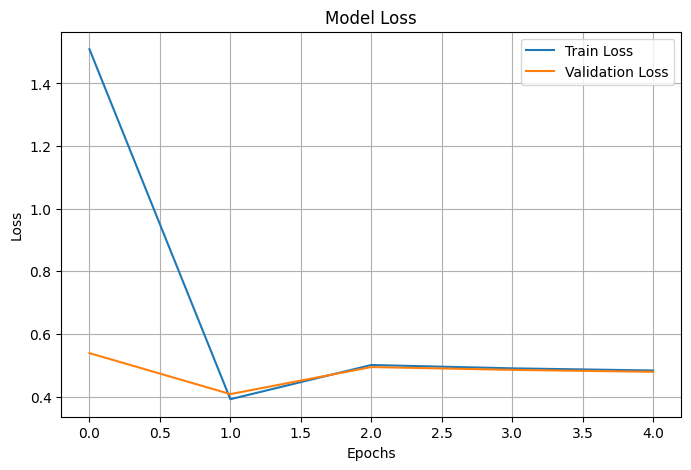

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training model with L2 rate: 0.03 and Dropout rate: 0.4
Epoch 1/5
2349/2349 [==============================] - 2698s 1s/step - loss: 1.7728 - accuracy: 0.8218 - roc_auc: 0.8260 - val_loss: 0.8156 - val_accuracy: 0.8189 - val_roc_auc: 0.8269
Epoch 2/5
2349/2349 [==============================] - 2689s 1s/step - loss: 0.6748 - accuracy: 0.8232 - roc_auc: 0.8259 - val_loss: 0.5817 - val_accuracy: 0.8189 - val_roc_auc: 0.8729
Epoch 3/5
2349/2349 [==============================] - 2686s 1s/step - loss: 0.5476 - accuracy: 0.8232 - roc_auc: 0.8250 - val_loss: 0.5158 - val_accuracy: 0.8189 - val_roc_auc: 0.8492
Epoch 4/5
  50/2349 [..............................] - ETA: 40:43 - loss: 0.4950 - accuracy: 0.8375 - roc_auc: 0.8393

In [ ]:
l2_rates = [0.01, 0.03, 0.05]  # Testing different L2 rates
dropout_rates = [0.3, 0.4, 0.5]  # Testing different dropout rates

for l2_rate in l2_rates:
    for dropout_rate in dropout_rates:
        model = create_bert_sentiment_model(model_name='bert-base-uncased', num_labels=2, dropout_rate=dropout_rate, l2_rate=l2_rate)
        model.compile(optimizer=Adam(learning_rate=5e-5), loss='binary_crossentropy', metrics=['accuracy', AUC(name='roc_auc')])

        print(f"Training model with L2 rate: {l2_rate} and Dropout rate: {dropout_rate}")
        history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)
        results = model.evaluate(test_dataset)
        print(f"Accuracy: {results[1]}, ROC AUC: {results[2]}")
        plot_history(history, ['accuracy', 'loss'])